# Author: Ashcroft Johnny Johnson

# The University of Huddersfield

# MSc Data Analytics _ Machine Learning 

# Year 2023

# email: ashcroft.j.johnson@outlook.com


##  Predict confirmed COVID-19 cases among suspected cases.

1. Based on the results of laboratory tests commonly collected
   for a suspected COVID-19 case during a visit to the
   emergency room, would it be possible to predict the test
   result for SARS-Cov-2 (positive/negative)?
   
   
2. The following questions would be posed during the Featuring phase in order to gain an understanding of the Covid-19 cases:

   What are the most common symptoms of COVID-19 patients who present to the emergency room?
   
   Are there any specific demographic factors (age, gender, ethnicity) that are associated with a higher likelihood of        testing positive for SARS-Cov-2?
   
   How does the timing of symptom onset relate to the likelihood of testing positive for SARS-Cov-2?
   
   Is there a correlation between the severity of symptoms and the likelihood of testing positive for SARS-Cov-2?
   
   Can certain laboratory values (e.g. white blood cell count, CRP levels) predict the likelihood of testing positive for   SARS-Cov-2 in patients who present to the emergency room?
   
   Are there any specific clinical characteristics (e.g. comorbidities, history of travel) that increase the likelihood of  testing positive for SARS-Cov-2?
   
   How accurate are rapid diagnostic tests for SARS-Cov-2 in patients who present to the emergency room with COVID-19 symptoms?
   
   
3. Target variable : SARS-Cov-2 exam result

# Exploratory Data Analysis

# Feature Engineering - Phase 

1. Importing relevant libraries for our investigation

2. Important libraries such as numpy, pandas, and seaborn, just to name a few, have been imported.

In [1]:
import pandas as ashcroft
import numpy as johnny
import seaborn as johnson
import matplotlib.pyplot as ash
import missingno as msno
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score,roc_auc_score, confusion_matrix, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')


 # Step 1: Importing the data from an excel file 
 
1. The initial step involves importing the data from an excel file and storing it in a pandas DataFrame

In [2]:
# We load the data into a data structure that allows us to manipulate and analyze it.

# We can use pandas library in Python to load the data into a data frame.

investigation_johnny_johnson = ashcroft.read_excel("C:/Users/ashcr/Downloads/archive/dataset.xlsx")

positive_case = investigation_johnny_johnson.loc[investigation_johnny_johnson['SARS-Cov-2 exam result'] == 'positive']
negative_case = investigation_johnny_johnson.loc[investigation_johnny_johnson['SARS-Cov-2 exam result'] == 'negative']

display(investigation_johnny_johnson)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                     

In [3]:
# Creates a new Pandas DataFrame, that is a copy of the original DataFrame data.

investigation = investigation_johnny_johnson.copy()

# Basic Analysis

1. After loading the data, we need to understand the structure of the data frame and the different variables

2. Target variable : SARS-Cov-2 exam result

3. Rows and columns : 5644 and 111

In [4]:
# The code below prints the first rows.
investigation.head(50)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0   44477f75e8169d2                    13               negative   
1   126e9dd13932f68                    17               negative   
2   a46b4402a0e5696                     8               negative   
3   f7d619a94f97c45                     5               negative   
4   d9e41465789c2b5                    15               negative   
5   75f16746216c4d1                     9               negative   
6   2a2245e360808d7                    13               negative   
7   509197ec73f1400                    16               negative   
8   8bb9d64f0215244                     1               negative   
9   5f1ed301375586c                    17               negative   
10  d720464cc322b6f                     8               negative   
11  02c84e61d5f9e18                     1               negative   
12  b68a6f32fd88a49                     1               negative   
13  0fbafd910aa8078                    13               negative   
14  f9056545d1296ec                    14               negative   
15  6c9d3323975b082                     9               negative   
16  b62e45a8a3f683e                    15               negative   
17  99da3c055438133                    13               negative   
18  d3ea751f3db9de9                    11               negative   
19  315cc65959223e0                     9               negative   
20  fe656baa2bfc5dd                     0               negative   
21  93b8a7ad37b1400                    17               negative   
22  2c2eae16c12a18a                     9               negative   
23  59b54b15e19da77                     9               negative   
24  d153a96599e2d41                    13               negative   
25  6b43d02183a4e72                     3               negative   
26  fe26809ebb6ef44                    11               negative   
27  50abe42feb0b703                    11               negative   
28  fc41531ca4faf1e                    13               negative   
29  891d0f6449ff3d7                    14               negative   
30  ebdd7c67fcb21b4                     9               negative   
31  554ce78d5936fe8                    13               negative   
32  296adf066a9bf03                     8               negative   
33  6da0fb1799dbf57                    17               negative   
34  0b1e43c5e3fb1d1                    17               negative   
35  39bfa1be6de588e                     3               negative   
36  c0aa8a22eaccb63                    14               negative   
37  a1bd3d591a72633                    10               negative   
38  826f654dbf80245                    16               negative   
39  2e1cada13fa6439                     6               negative   
40  a2432a45830c32d                    15               negative   
41  18033e288631304                    12               negative   
42  27b26b840b56278                     6               negative   
43  0f91de4ee066dbb                     3               negative   
44  c6da0f9185a0d3d                     6               negative   
45  62e504c6781b50e                    16               negative   
46  5c39241fdb4d9c7                    13               negative   
47  56112eca73447bf                    19               negative   
48  08bafb971c192a4                    11               negative   
49  adb014b831971bd                    11               negative   

    Patient addmited to regular ward (1=yes, 0=no)  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
5                                                0   
6                                                0   
7                                                0   
8                                                0   


In [5]:
# In pandas, investigation.T is an attribute used to transpose a pandas DataFrame, 
# i.e., it swaps the rows and columns of the DataFrame
# In the resulting DataFrame, the column names of the original DataFrame become the row names, 
# and the row names of the original DataFrame become the column names.

investigation.T

0     \
Patient ID                                          44477f75e8169d2   
Patient age quantile                                             13   
SARS-Cov-2 exam result                                     negative   
Patient addmited to regular ward (1=yes, 0=no)                    0   
Patient addmited to semi-intensive unit (1=yes,...                0   
...                                                             ...   
HCO3 (arterial blood gas analysis)                              NaN   
pO2 (arterial blood gas analysis)                               NaN   
Arteiral Fio2                                                   NaN   
Phosphor                                                        NaN   
ctO2 (arterial blood gas analysis)                              NaN   

                                                               1     \
Patient ID                                          126e9dd13932f68   
Patient age quantile                                             17   
SARS-Cov-2 exam result                                     negative   
Patient addmited to regular ward (1=yes, 0=no)                    0   
Patient addmited to semi-intensive unit (1=yes,...                0   
...                                                             ...   
HCO3 (arterial blood gas analysis)                              NaN   
pO2 (arterial blood gas analysis)                               NaN   
Arteiral Fio2                                                   NaN   
Phosphor                                                        NaN   
ctO2 (arterial blood gas analysis)                              NaN   

                                                               2     \
Patient ID                                          a46b4402a0e5696   
Patient age quantile                                              8   
SARS-Cov-2 exam result                                     negative   
Patient addmited to regular ward (1=yes, 0=no)                    0   
Patient addmited to semi-intensive unit (1=yes,...                0   
...                                                             ...   
HCO3 (arterial blood gas analysis)                              NaN   
pO2 (arterial blood gas analysis)                               NaN   
Arteiral Fio2                                                   NaN   
Phosphor                                                        NaN   
ctO2 (arterial blood gas analysis)                              NaN   

                                                               3     \
Patient ID                                          f7d619a94f97c45   
Patient age quantile                                              5   
SARS-Cov-2 exam result                                     negative   
Patient addmited to regular ward (1=yes, 0=no)                    0   
Patient addmited to semi-intensive unit (1=yes,...                0   
...                                                             ...   
HCO3 (arterial blood gas analysis)                              NaN   
pO2 (arterial blood gas analysis)                               NaN   
Arteiral Fio2                                                   NaN   
Phosphor                                                        NaN   
ctO2 (arterial blood gas analysis)                              NaN   

                                                               4     \
Patient ID                                          d9e41465789c2b5   
Patient age quantile                                             15   
SARS-Cov-2 exam result                                     negative   
Patient addmited to regular ward (1=yes, 0=no)                    0   
Patient addmited to semi-intensive unit (1=yes,...                0   
...                                                             ...   
HCO3 (arterial blood gas analysis)                              NaN   
pO2 (arterial blood gas analysis)                               NaN   
Arteiral Fio

In [6]:
# investigation.tail() is a Pandas DataFrame 
# method that returns the last n rows of a DataFrame,
# where n is an integer argument (by default, n=5). 
# This can be useful for quickly inspecting the end of a DataFrame.

investigation.tail()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
5639                                   NaN   
5640                                   NaN   
5641                                   NaN   
5642                                   NaN   
5643                                   NaN   

      pCO2 (arterial blood gas analysis)  \
5639                                 NaN   
5640                                 NaN   
5641                                 NaN   
5642                                 NaN   
5643                                 NaN   

      Base excess (arterial blood gas analysis)  \
5639                                        NaN   
5640                                        NaN   
5641                                        NaN   
5642                                        NaN   
5643                                        NaN   

      pH (arterial blood gas analysis)  \
5639                               NaN   
5640                               NaN   
5641                               NaN   
5642                               NaN   
5643                               NaN   

      Total CO2 (arterial blood gas analysis)  \
5639                                      NaN   
5640                                      NaN   
5641                                      NaN   
5642                                      NaN   
5643                                      NaN   

      HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
5639                                 NaN                                NaN   
5640                                 NaN                                NaN   
5641                                 NaN                                NaN   
5642                                 NaN                                NaN   
5643                                 NaN                                NaN   

      Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
5639            NaN       NaN                                 NaN  
5640            NaN       NaN                               

In [7]:
# "investigation.index" attribute returns the row labels or index values of the DataFrame or Series.
# The index is usually a sequence of integers or a sequence of labels that uniquely identify each row in the data.
investigation.index

RangeIndex(start=0, stop=5644, step=1)

In [8]:
investigation.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [9]:
# Get all columns in ascending order

cols_all = sorted(investigation.columns)

print(cols_all)

['Adenovirus', 'Alanine transaminase', 'Albumin', 'Alkaline phosphatase', 'Arteiral Fio2', 'Arterial Lactic Acid', 'Aspartate transaminase', 'Base excess (arterial blood gas analysis)', 'Base excess (venous blood gas analysis)', 'Basophils', 'Bordetella pertussis', 'Chlamydophila pneumoniae', 'Coronavirus HKU1', 'Coronavirus229E', 'CoronavirusNL63', 'CoronavirusOC43', 'Creatine phosphokinase\xa0(CPK)\xa0', 'Creatinine', 'D-Dimer', 'Direct Bilirubin', 'Eosinophils', 'Ferritin', 'Fio2 (venous blood gas analysis)', 'Gamma-glutamyltransferase\xa0', 'HCO3 (arterial blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Hb saturation (arterial blood gases)', 'Hb saturation (venous blood gas analysis)', 'Hematocrit', 'Hemoglobin', 'Indirect Bilirubin', 'Inf A H1N1 2009', 'Influenza A', 'Influenza A, rapid test', 'Influenza B', 'Influenza B, rapid test', 'International normalized ratio (INR)', 'Ionized calcium\xa0', 'Lactic Dehydrogenase', 'Leukocytes', 'Lipase dosage', 'Lymphocytes', 'Mag

In [10]:
# This code will print out all the columns & information it contains.
print(investigation)

           Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                              

In [11]:
print("The total length of the Covid-19 dataset is: " , len(list(investigation[0:1:-1])))

The total length of the Covid-19 dataset is:  111


# To verify the size of Covid-19 dataset: 

 1.  We can utilize the built-in function in Jupyter Notebook.

In [12]:
print("The total size of Covid-19 Dataset is: ",  investigation.shape)

The total size of Covid-19 Dataset is:  (5644, 111)


# Getting data information 

In [13]:
# In Pandas, df.keys() is used to get the column labels of the DataFrame as a list. 
# It returns a list of column names present in the DataFrame. 
# This function is useful to get a quick overview of the column names in a DataFrame

investigation.keys()

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [14]:
# In Python, .info() is a method used to retrieve a concise summary of a pandas DataFrame
# When applied to a DataFrame, it provides information about the number of non-null values,
# data type, and memory usage for each column

investigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [15]:
# The memory_usage parameter set to 'deep' 
# provides an accurate memory usage by recursively iterating through the object, 
# accounting for its constituent objects

investigation.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 10.9 MB


In [16]:
# We then use the dtypes attribute to print the data type of each column
print(investigation.dtypes)

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object


In [17]:
print(dict(investigation.dtypes))

{'Patient ID': dtype('O'), 'Patient age quantile': dtype('int64'), 'SARS-Cov-2 exam result': dtype('O'), 'Patient addmited to regular ward (1=yes, 0=no)': dtype('int64'), 'Patient addmited to semi-intensive unit (1=yes, 0=no)': dtype('int64'), 'Patient addmited to intensive care unit (1=yes, 0=no)': dtype('int64'), 'Hematocrit': dtype('float64'), 'Hemoglobin': dtype('float64'), 'Platelets': dtype('float64'), 'Mean platelet volume ': dtype('float64'), 'Red blood Cells': dtype('float64'), 'Lymphocytes': dtype('float64'), 'Mean corpuscular hemoglobin concentration\xa0(MCHC)': dtype('float64'), 'Leukocytes': dtype('float64'), 'Basophils': dtype('float64'), 'Mean corpuscular hemoglobin (MCH)': dtype('float64'), 'Eosinophils': dtype('float64'), 'Mean corpuscular volume (MCV)': dtype('float64'), 'Monocytes': dtype('float64'), 'Red blood cell distribution width (RDW)': dtype('float64'), 'Serum Glucose': dtype('float64'), 'Respiratory Syncytial Virus': dtype('O'), 'Influenza A': dtype('O'), 'In

In [18]:
# The first line of code for col in df.select_dtypes('Object'): 
# is a loop that iterates through all columns in the DataFrame that have data type object
# The columns with values less than or equal to 50 would be printed out.

for col in investigation.select_dtypes('object'):
  print(f'{col :-<50} ,{investigation[col].unique()}')

Patient ID---------------------------------------- ,['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result---------------------------- ,['negative' 'positive']
Respiratory Syncytial Virus----------------------- ,[nan 'not_detected' 'detected']
Influenza A--------------------------------------- ,[nan 'not_detected' 'detected']
Influenza B--------------------------------------- ,[nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- ,[nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- ,[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- ,[nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- ,[nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- ,[nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- ,[nan 'not_detected' 'detected']
A

In [19]:
# This code is useful for exploring categorical variables in a dataset
# by examining the frequency of unique values in each object column.

for col in investigation.select_dtypes('object'):
    print(investigation[col].value_counts())

44477f75e8169d2    1
49380516a6ab929    1
4cc386f25ce2476    1
bd50f83e6d874ca    1
854d3014fc4bb8e    1
                  ..
b9a698635fced54    1
dc00f87e8d11175    1
1441e07878b84cc    1
2800daa2454f4ae    1
2697fdccbfeb7f7    1
Name: Patient ID, Length: 5644, dtype: int64
negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64
not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64
not_detected    1336
detected          18
Name: Influenza A, dtype: int64
not_detected    1277
detected          77
Name: Influenza B, dtype: int64
not_detected    1349
detected           3
Name: Parainfluenza 1, dtype: int64
not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64
not_detected    973
detected        379
Name: Rhinovirus/Enterovirus, dtype: int64
not_detected    1332
detected          20
Name: Coronavirus HKU1, dtype: int64
not_detected    1342
detected          10
Name: Parainfluenza 3, dtype: int64
not_detected 

In [20]:
# Investigation.dtypes returns a pandas Series with the data type of each column in a dataframe. 
# investigation.dtypes.value_counts() applies the value_counts()
# method to this Series to count the number of columns with each data type

investigation.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

# Confronted with the absence of certain values:

1. The dataset we are working with contains some NaN values 

2. Which need to be addressed using statistical techniques in Pandas.

3. There are several ways to handle missing values in Pandas. 

4. One approach is to drop the entire row or instance that contains the missing value.

5. Missing values are identified in Python as np.nan (NaN values in numpy). 

6. There are various common strategies for replacing missing values, 

7. Including using the df.dropna function to remove rows or columns with missing data, or the 

8. df.fillna() function to replace missing values with other values, such as the mean, mode, or median.

9. To determine which columns have missing information, the for loop provided below can be used.

In [21]:
 # This creates a list of all the column names in the DataFrame df using a for loop 
 # that iterates over the df.columns object
 # The variable features is a temporary variable used to represent each column name.
 # if df[features].isnull().sum()>0: This condition checks if there are any missing values 
 # in the current column (df[features]). If the sum of the missing values is greater than 0,
 # then the column name (features) is included in the list comprehension.
    
[features for features in investigation.columns if investigation[features].isnull().sum()>0]

['Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Influenza B, rapid test',
 'Influenza A, rapid test',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 '

In [22]:
# This code reads the csv file into a pandas DataFrame object and then 
# checks for missing values in all columns using the isnull() method. 
# The any() method returns a boolean mask indicating if any value in each column is missing. 
# The columns method is used to get a list of column names, and null_cols
# is assigned the subset of column names where at least one value is missing. 
# Finally, the code prints the column names with missing values.
# check for missing values in all columns

null_cols = investigation.columns[investigation.isnull().any()]

print("Columns with missing values:", null_cols)

Columns with missing values: Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=105)


In [23]:
# The code "df.isna().sum()" is used to count the number of missing values in each column of the dataframe "investigation".

investigation.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [24]:
# (investigation.isna().sum()/investigation.shape[0]) divides 
# the number of missing values in each column by the total number of rows,
# resulting in the percentage of missing values in each column.

(investigation.isna().sum()/investigation.shape[0]).sort_values(ascending=True)

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

# In this code, pd.option_context sets 

1. the options for printing the DataFrame without any row or column limits,

2. so that all missing values can be displayed

In [25]:
# Get the count of missing values in each column
missing_values_count = investigation.isnull().sum()

# Print all missing values without any break
with ashcroft.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values_count)

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [26]:
# In the code above, investigation.isna().sum() 
# calculates the number of missing values in each column, 
# and len(investigation.) gives the total number of rows in the dataframe. 
# The result is then multiplied by 100 to convert it to a percentage.
# Calculate the percentage of missing values in each column

#  Calculate the percentage of missing values in each column
percent_missing = investigation.isna().sum() / len(investigation) * 100

# Print the result
print(percent_missing)

Patient ID                                                0.000000
Patient age quantile                                      0.000000
SARS-Cov-2 exam result                                    0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
                                                           ...    
HCO3 (arterial blood gas analysis)                       99.521616
pO2 (arterial blood gas analysis)                        99.521616
Arteiral Fio2                                            99.645641
Phosphor                                                 99.645641
ctO2 (arterial blood gas analysis)                       99.521616
Length: 111, dtype: float64


# Visualization Missing Data 
1. The bar plot below helps you to visualise the Missing Values or NAN Values in the datase

The size in row is: 5644


<AxesSubplot:>

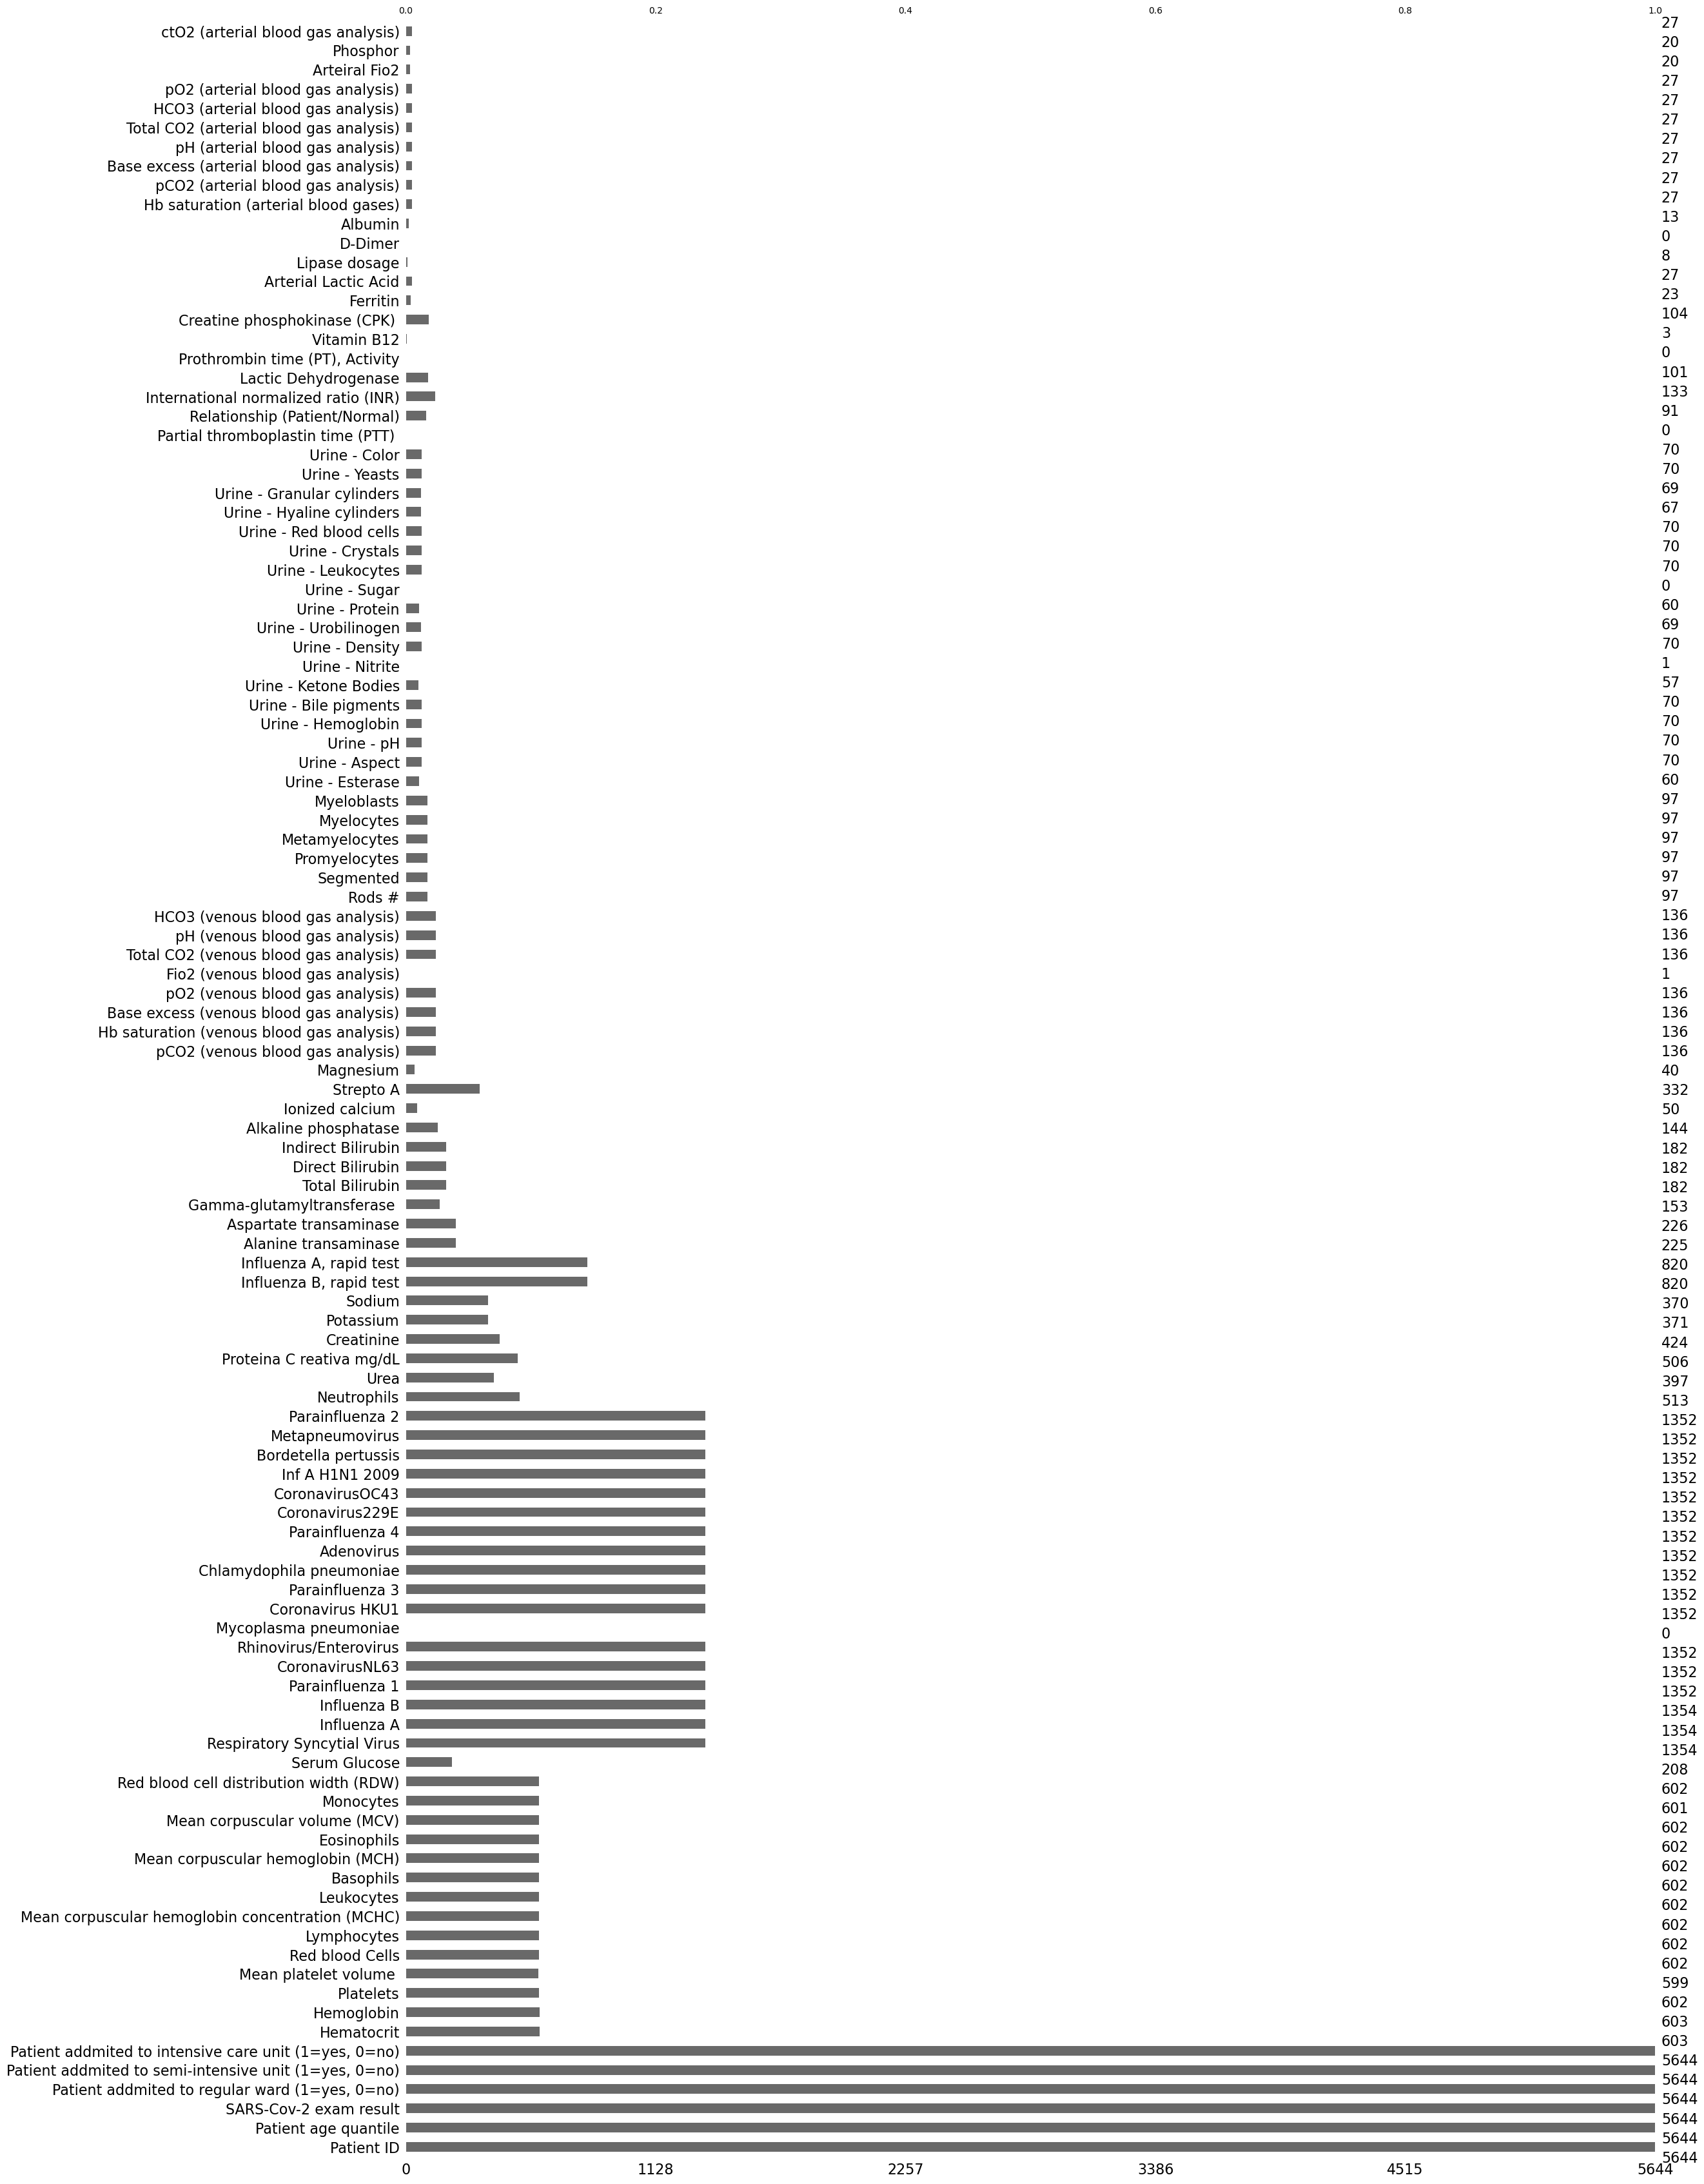

In [27]:
# This help us understand the row size:
print ('The size in row is:',investigation.shape[0])
msno.bar(investigation)

In [28]:
Looking_missing = investigation.isna().sum()/investigation.shape[0]
results_blood_per_columns = investigation.columns[(Looking_missing < 0.90) & (Looking_missing > 0.87)]

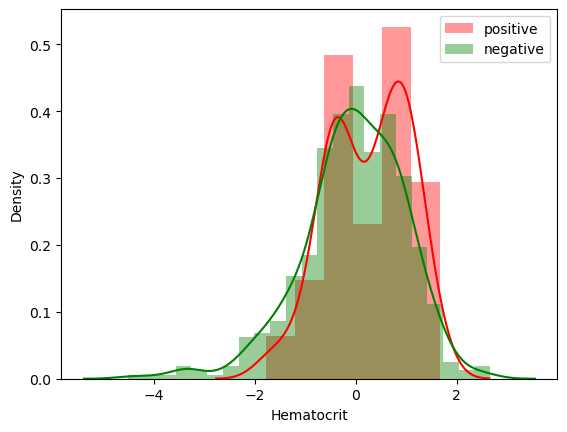

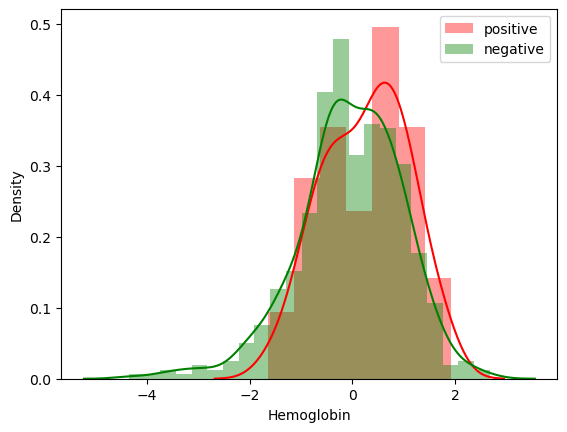

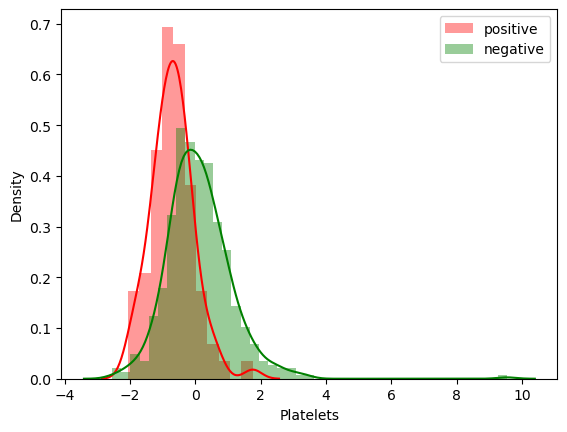

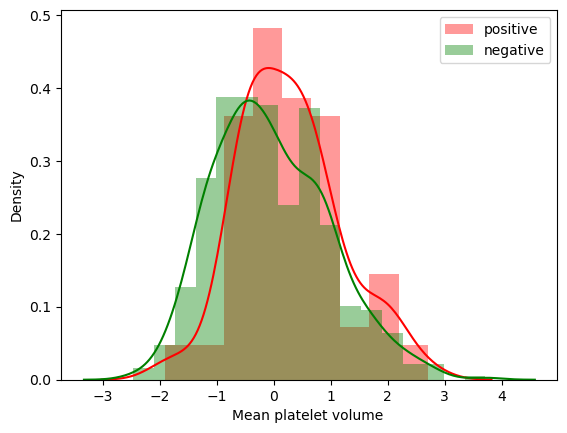

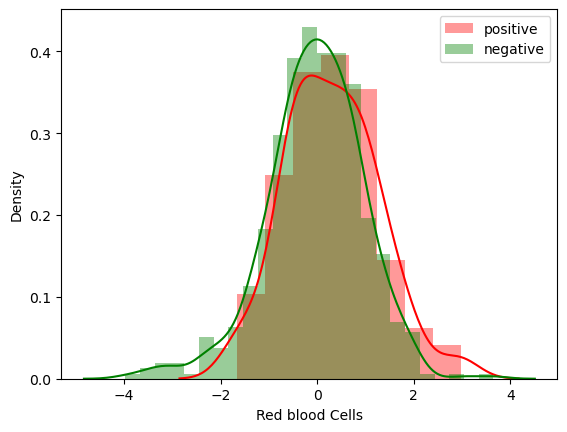

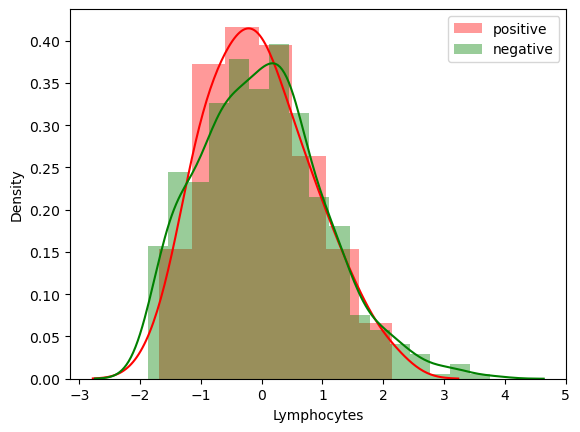

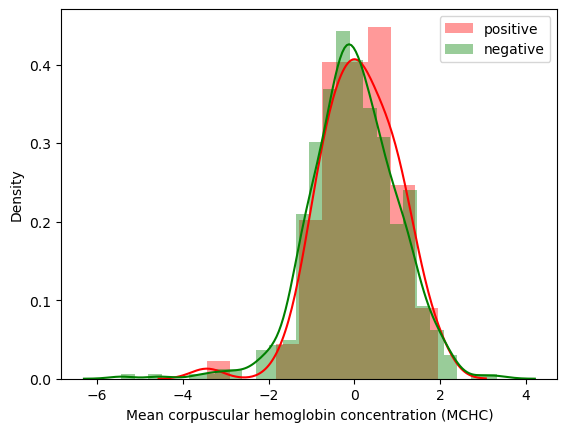

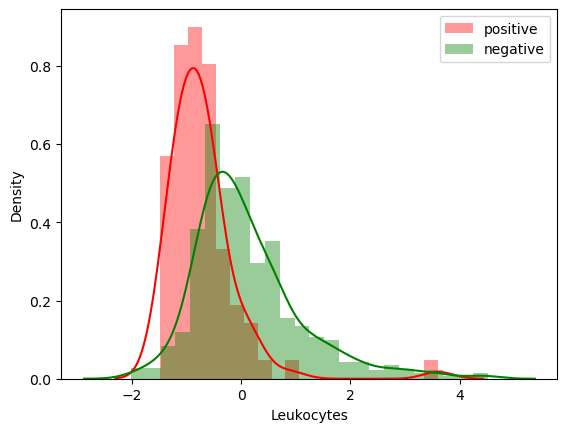

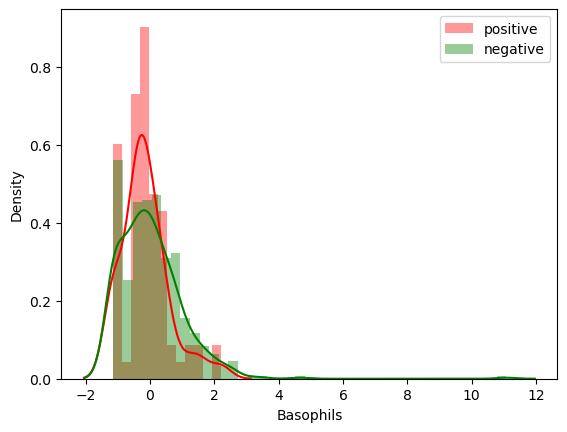

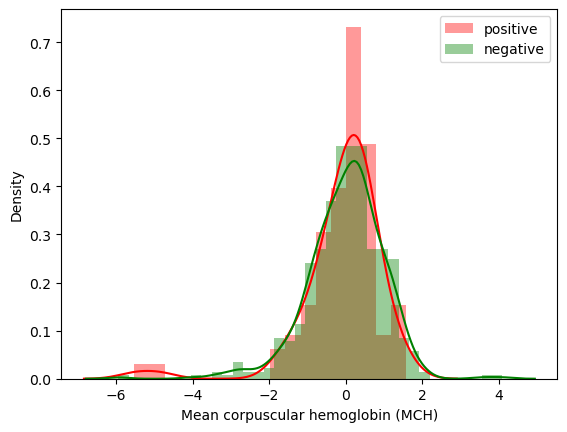

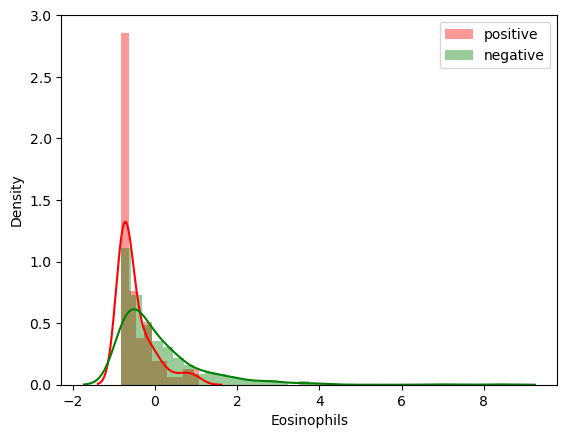

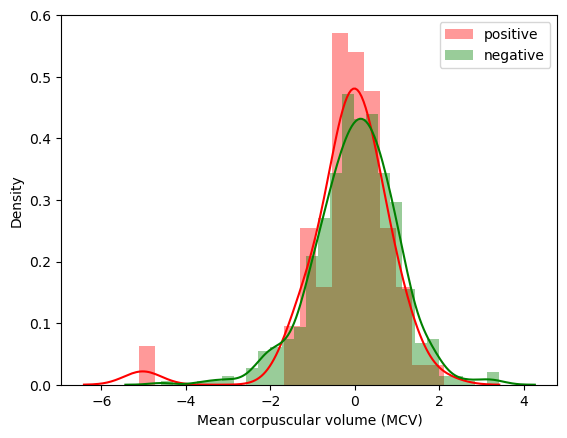

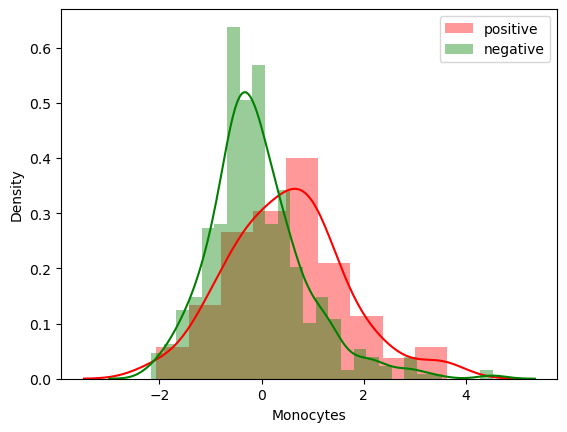

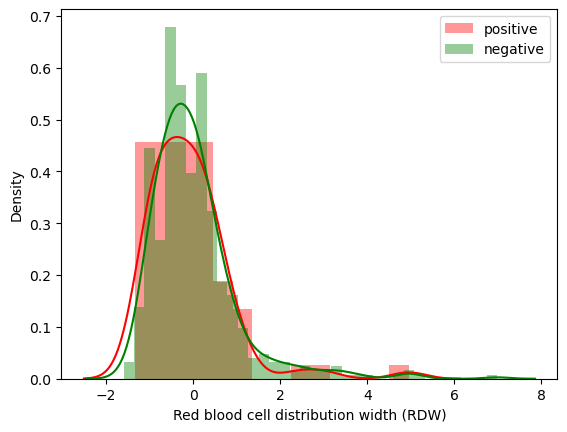

In [29]:
for col in results_blood_per_columns:
    ash.figure()
    johnson.distplot(positive_case[col],label='positive', color='red')
    johnson.distplot(negative_case[col],label='negative', color='green')
    ash.legend()

# Descriptive Analysis

1. Descriptive analysis is an essential step in data analysis because it provides a summary of the key features 

2. and characteristics of the data set. It helps to explore the underlying patterns and relationships in the data, 

3. detect outliers, missing values, and understand the distribution of the variables. 

4. By performing descriptive analysis, we can gain insights into the nature of the data, 


5. which can guide the selection of appropriate statistical techniques and models for further analysis

In [30]:
# In Pandas, df.describe() is a method used to generate descriptive statistics of a DataFrame. 
# The method returns a DataFrame containing various summary statistics of each numeric column in the input DataFrame df.
# The output shows various summary statistics of each column such as count,
# mean, standard deviation, minimum, maximum, and quartiles.

investigation.describe()

# count: Number of non-null values in the column.
# mean: Arithmetic mean (average) of the column.
# std: Standard deviation of the column.
# min: Minimum value in the column.
# 25%: First quartile (25th percentile) of the column.
# 50%: Second quartile (median or 50th percentile) of the column.
# 75%: Third quartile (75th percentile) of the column.
# max: Maximum value in the column.

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  ...  Hb saturation (arterial blood gases)  \
count  6.020000e+02  ...                          2.700000e+01   
mean  -7.866736e-09  ...                         -1.379737e-10   
std    1.000832e+00  ...                          1.019049e+00   
min   -1.865070e+00  ...                         -1.999560e+00   
25%   -7.307069e-01  ...                         -1.122574e+00   
50%   -1.426696e-02  ...                          2.677689e-01   
75%    5.976919e-01  ...                          7.383496e-01   
max    3.764100e+00  ...                          1.337265e+00   

       pCO2 (arterial blood gas analysis)  \
count                        2.700000e+01   
mean                         8.416397e-09   
std                          1.019049e+00   
min                         -1.244817e+00   
25%                         -5.348102e-01   
50%                         -2.120799e-01   
75%                          2.305214e-02   
max                          3.236524e+00   

       Base excess (arterial blood gas analysis)  \
count                               2.700000e+01   
mean                               -1.655685e-09   
std                                 1.019049e+00   
min                                -3.082674e+00   
25%                                -3.308668e-01   
50%     

In [31]:
investigation.describe().T

# The T attribute transposes the resulting DataFrame, 
# which means it switches the rows and columns. So df.describe().T 
# returns a transposed DataFrame, where the statistics for each column are shown as rows

count          mean  \
Patient age quantile                                5644.0  9.318391e+00   
Patient addmited to regular ward (1=yes, 0=no)      5644.0  1.399717e-02   
Patient addmited to semi-intensive unit (1=yes,...  5644.0  8.858965e-03   
Patient addmited to intensive care unit (1=yes,...  5644.0  7.264352e-03   
Hematocrit                                           603.0 -2.186214e-09   
...                                                    ...           ...   
HCO3 (arterial blood gas analysis)                    27.0  6.070843e-09   
pO2 (arterial blood gas analysis)                     27.0 -2.469729e-08   
Arteiral Fio2                                         20.0  4.656613e-09   
Phosphor                                              20.0  6.332993e-09   
ctO2 (arterial blood gas analysis)                    27.0  5.243001e-09   

                                                         std       min  \
Patient age quantile                                5.777903  0.000000   
Patient addmited to regular ward (1=yes, 0=no)      0.117489  0.000000   
Patient addmited to semi-intensive unit (1=yes,...  0.093713  0.000000   
Patient addmited to intensive care unit (1=yes,...  0.084929  0.000000   
Hematocrit                                          1.000830 -4.501420   
...                                                      ...       ...   
HCO3 (arterial blood gas analysis)                  1.019049 -2.985592   
pO2 (arterial blood gas analysis)                   1.019049 -1.175907   
Arteiral Fio2                                       1.025978 -1.532932   
Phosphor                                            1.025978 -1.480526   
ctO2 (arterial blood gas analysis)                  1.019049 -2.900254   

                                                         25%       50%  \
Patient age quantile                                4.000000  9.000000   
Patient addmited to regular ward (1=yes, 0=no)      0.000000  0.000000   
Patient addmited to semi-intensive unit (1=yes,...  0.000000  0.000000   
Patient addmited to intensive care unit (1=yes,...  0.000000  0.000000   
Hematocrit                                         -0.518807  0.053407   
...                                                      ...       ...   
HCO3 (arterial blood gas analysis)                 -0.539721  0.056332   
pO2 (arterial blood gas analysis)                  -0.816990 -0.159955   
Arteiral Fio2                                      -0.121498 -0.011744   
Phosphor                                           -0.552730 -0.138182   
ctO2 (arterial blood gas analysis)                 -0.485279  0.182693   

                                                          75%        max  
Patient age quantile                                14.000000  19.000000  
Patient addmited to regular ward (1=yes, 0=no)       0.000000   1.000000  
Patient addmited to semi-intensive unit (1=yes,...   0.000000   1.000000  
Patient addmited to intensive care unit (1=yes,...   0.000000   1.000000  
Hematocrit                                           0.717175   2.662704  
...                                                       ...        ...  
HCO3 (arterial blood gas analysis)                   0.508510   2.029471  
pO2 (arterial blood gas analysis)                    0.450009   2.205371  
Arteiral Fio2                                       -0.011744   2.841856  
Phosphor                                             0.276365   2.862350  
ctO2 (arterial blood gas analysis)                   0.593753   1.826932  

[74 rows x 8 columns]

In [32]:
# ".describe()" is a built-in Pandas method that generates descriptive statistics of the dataset, 
# including the count, mean, standard deviation, minimum, maximum, and quartiles for the numeric variables. 
# "include="all"" specifies that all columns in the dataset should be included in the summary, 
# including both numeric and categorical variables.

investigation.describe(include="all").T

count unique  \
Patient ID                                            5644   5644   
Patient age quantile                                5644.0    NaN   
SARS-Cov-2 exam result                                5644      2   
Patient addmited to regular ward (1=yes, 0=no)      5644.0    NaN   
Patient addmited to semi-intensive unit (1=yes,...  5644.0    NaN   
...                                                    ...    ...   
HCO3 (arterial blood gas analysis)                    27.0    NaN   
pO2 (arterial blood gas analysis)                     27.0    NaN   
Arteiral Fio2                                         20.0    NaN   
Phosphor                                              20.0    NaN   
ctO2 (arterial blood gas analysis)                    27.0    NaN   

                                                                top  freq  \
Patient ID                                          44477f75e8169d2     1   
Patient age quantile                                            NaN   NaN   
SARS-Cov-2 exam result                                     negative  5086   
Patient addmited to regular ward (1=yes, 0=no)                  NaN   NaN   
Patient addmited to semi-intensive unit (1=yes,...              NaN   NaN   
...                                                             ...   ...   
HCO3 (arterial blood gas analysis)                              NaN   NaN   
pO2 (arterial blood gas analysis)                               NaN   NaN   
Arteiral Fio2                                                   NaN   NaN   
Phosphor                                                        NaN   NaN   
ctO2 (arterial blood gas analysis)                              NaN   NaN   

                                                        mean       std  \
Patient ID                                               NaN       NaN   
Patient age quantile                                9.318391  5.777903   
SARS-Cov-2 exam result                                   NaN       NaN   
Patient addmited to regular ward (1=yes, 0=no)      0.013997  0.117489   
Patient addmited to semi-intensive unit (1=yes,...  0.008859  0.093713   
...                                                      ...       ...   
HCO3 (arterial blood gas analysis)                       0.0  1.019049   
pO2 (arterial blood gas analysis)                       -0.0  1.019049   
Arteiral Fio2                                            0.0  1.025978   
Phosphor                                                 0.0  1.025978   
ctO2 (arterial blood gas analysis)                       0.0  1.019049   

                                                         min       25%  \
Patient ID                                               NaN       NaN   
Patient age quantile                                     0.0       4.0   
SARS-Cov-2 exam result                                   NaN       NaN   
Patient addmited to regular ward (1=yes, 0=no)           0.0       0.0   
Patient addmited to semi-intensive unit (1=yes,...       0.0       0.0   
...                                                      ...       ...   
HCO3 (arterial blood gas analysis)                 -2.985592 -0.539721   
pO2 (arterial blood gas analysis)                  -1.175907  -0.81699   
Arteiral Fio2                                      -1.532932 -0.121498   
Phosphor                                           -1.480526  -0.55273   
ctO2 (arterial blood gas analysis)                 -2.900254 -0.485279   

                                                         50%       75%  \
Patient ID                                               NaN       NaN   
Patient age quantile                                     9.0      14.0   
SARS-Cov-2 exam result                                   NaN       NaN   
Patient addmited to regular ward (1=yes, 0=no)           0.0       0.0   
Patient addmited to semi-intensive unit (1=yes,...       0.0       0.0   
...                                                      ...       ...   
HCO

In [33]:
# The code filters this DataFrame based on the condition that only rows
# where the value in column "SAR-Cov-2 exam result" is equal to "NaN" should be included in the filtered DataFrame

investigation[investigation["SARS-Cov-2 exam result"].isin(["NaN" ])]

Empty DataFrame
Columns: [Patient ID, Patient age quantile, SARS-Cov-2 exam result, Patient addmited to regular ward (1=yes, 0=no), Patient addmited to semi-intensive unit (1=yes, 0=no), Patient addmited to intensive care unit (1=yes, 0=no), Hematocrit, Hemoglobin, Platelets, Mean platelet volume , Red blood Cells, Lymphocytes, Mean corpuscular hemoglobin concentration (MCHC), Leukocytes, Basophils, Mean corpuscular hemoglobin (MCH), Eosinophils, Mean corpuscular volume (MCV), Monocytes, Red blood cell distribution width (RDW), Serum Glucose, Respiratory Syncytial Virus, Influenza A, Influenza B, Parainfluenza 1, CoronavirusNL63, Rhinovirus/Enterovirus, Mycoplasma pneumoniae, Coronavirus HKU1, Parainfluenza 3, Chlamydophila pneumoniae, Adenovirus, Parainfluenza 4, Coronavirus229E, CoronavirusOC43, Inf A H1N1 2009, Bordetella pertussis, Metapneumovirus, Parainfluenza 2, Neutrophils, Urea, Proteina C reativa mg/dL, Creatinine, Potassium, Sodium, Influenza B, rapid test, Influenza A, rapid test, Alanine transaminase, Aspartate transaminase, Gamma-glutamyltransferase , Total Bilirubin, Direct Bilirubin, Indirect Bilirubin, Alkaline phosphatase, Ionized calcium , Strepto A, Magnesium, pCO2 (venous blood gas analysis), Hb saturation (venous blood gas analysis), Base excess (venous blood gas analysis), pO2 (venous blood gas analysis), Fio2 (venous blood gas analysis), Total CO2 (venous blood gas analysis), pH (venous blood gas analysis), HCO3 (venous blood gas analysis), Rods #, Segmented, Promyelocytes, Metamyelocytes, Myelocytes, Myeloblasts, Urine - Esterase, Urine - Aspect, Urine - pH, Urine - Hemoglobin, Urine - Bile pigments, Urine - Ketone Bodies, Urine - Nitrite, Urine - Density, Urine - Urobilinogen, Urine - Protein, Urine - Sugar, Urine - Leukocytes, Urine - Crystals, Urine - Red blood cells, Urine - Hyaline cylinders, Urine - Granular cylinders, Urine - Yeasts, Urine - Color, Partial thromboplastin time (PTT) , Relationship (Patient/Normal), International normalized ratio (INR), Lactic Dehydrogenase, Prothrombin time (PT), Activity, Vitamin B12, Creatine phosphokinase (CPK) , Ferritin, Arterial Lactic Acid, Lipase dosage, D-Dimer, ...]
Index: []

[0 rows x 111 columns]

<AxesSubplot:>

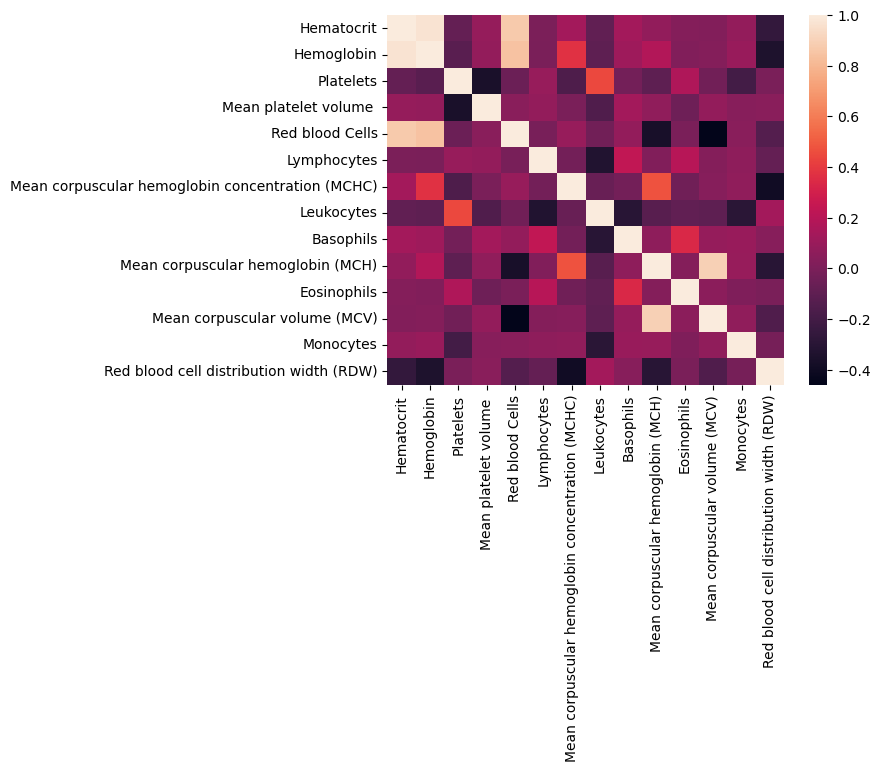

In [34]:
# "corr()" is a pandas function used to calculate the correlation between columns in the DataFrame.
#  It then calculates the correlation between the selected columns and creates a heatmap of the correlations
# using Seaborn's heatmap function. The resulting heatmap will display the correlation 
# between the selected columns as a color-coded matrix, with the color indicating the strength of the correlation.

johnson.heatmap(investigation[results_blood_per_columns].corr())

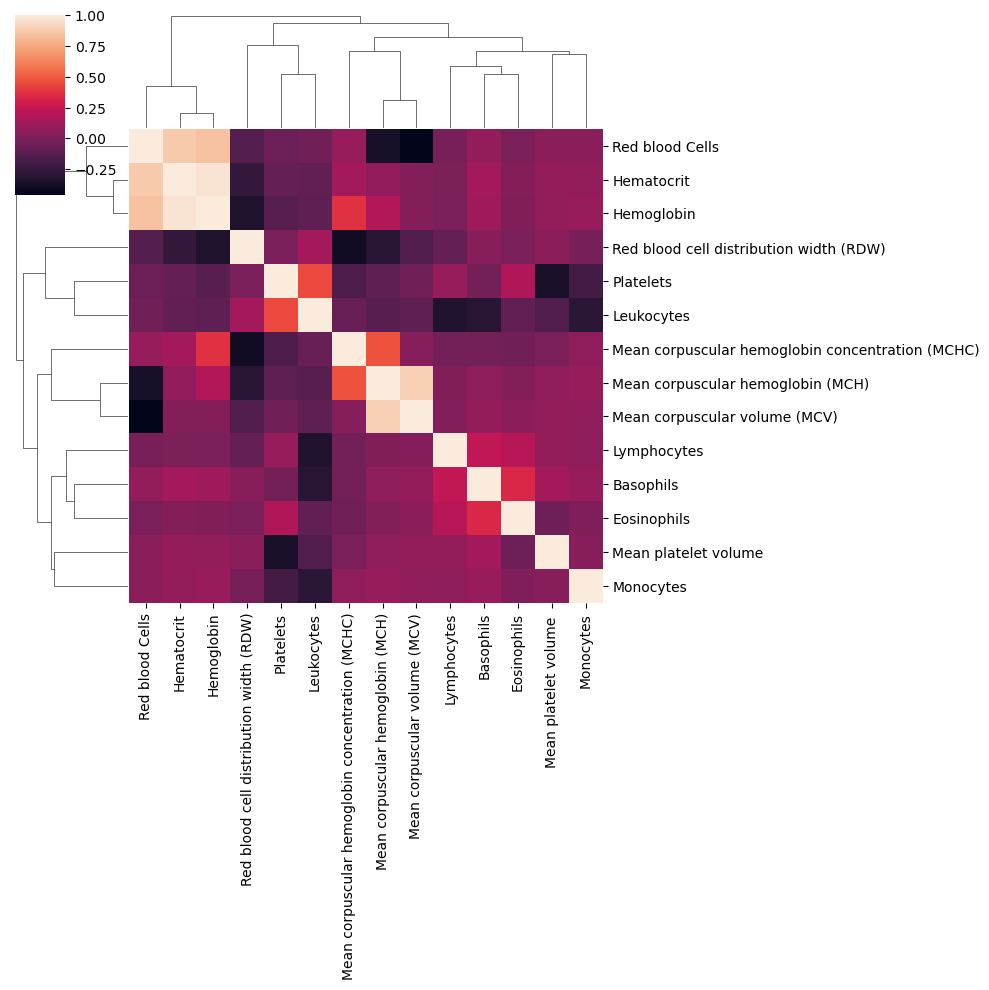

In [35]:
# The resulting plot is a heatmap that shows the pairwise correlation
# between the columns in results_blood_per_columns.
# The colors in the heatmap represent the strength of the correlation between each pair of columns,
# with warmer colors indicating stronger positive correlations 
# and cooler colors indicating stronger negative correlations. 
# Additionally, the rows and columns in the heatmap are clustered together based on their similarity 
# in correlation patterns, which can reveal underlying patterns and relationships in the data.

johnson.clustermap(investigation[results_blood_per_columns].corr())

# Now we can start exploring the data and identifying any patterns or relationships 

1. That can help us predict the test result for SARS-Cov-2. 

2. We can start by looking at the distribution of the SARS-Cov-2 exam result

In [36]:
# "investigation['SARS-Cov-2 exam result']" 
# refers to a specific column of a Pandas DataFrame named "investigation".
# the square brackets notation "[]" is used to index or select specific columns of a DataFrame.
# In this case, "SARS-Cov-2 exam result" is the name of the column being selected.

investigation["SARS-Cov-2 exam result"]

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object

In [37]:
# This will output the number of positive and negative test results

investigation['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

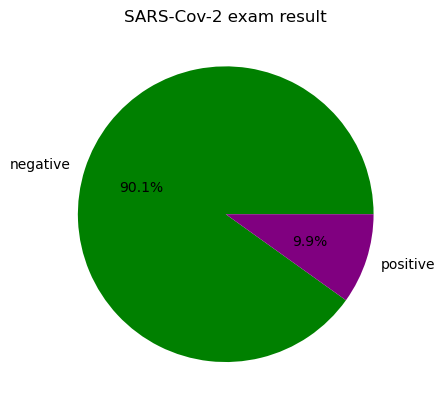

In [38]:
# count the values in the 'SARS-Cov-2 exam result' column
investigation_counts = investigation['SARS-Cov-2 exam result'].value_counts()

colors = ['green', 'purple'] # colors for the two parts

# add title
ash.title('SARS-Cov-2 exam result')

# plot a pie chart
ash.pie(investigation_counts, labels=investigation_counts.index, colors=colors, autopct='%1.1f%%')

ash.show()

# In the above code, the autopct parameter takes a format string 
# that specifies how to format the percentage values. %1.1f%% specifies to display the percentage with one decimal place.
# The double percentage sign %% is used to escape the % character, since it has a special meaning in format strings.

<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

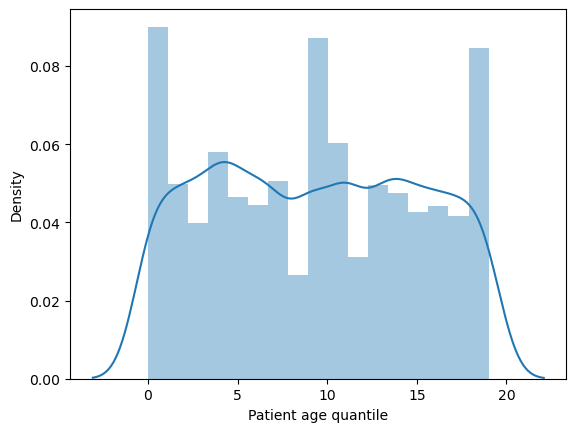

In [39]:
johnson.distplot(investigation['Patient age quantile'])

In [40]:
# Returns a series with the count of unique values in the column named 
# 'Patient age quantile' of the investigation dataframe or series.

investigation['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

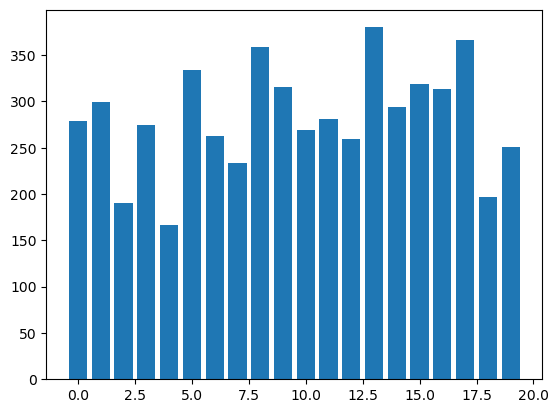

In [41]:
ash.bar(investigation['Patient age quantile'].unique(), investigation['Patient age quantile'].value_counts())

ash.show()

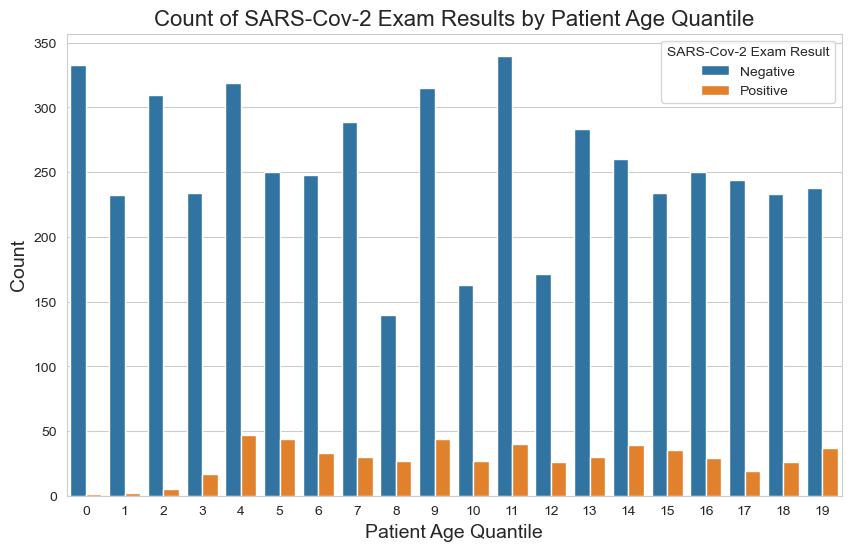

In [42]:
johnson.set_style('whitegrid')

ash.figure(figsize=(10,6))

johnson.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=investigation, palette=['#1f77b4','#ff7f0e'])
ash.title('Count of SARS-Cov-2 Exam Results by Patient Age Quantile', fontsize=16)
ash.xlabel('Patient Age Quantile', fontsize=14)
ash.ylabel('Count', fontsize=14)
ash.legend(title='SARS-Cov-2 Exam Result', loc='upper right', labels=['Negative', 'Positive'])
ash.show()

# Display frequency distribution table

In [43]:
# A contingency table is a table that displays the frequency distribution of two or more variables. 
# In this case, the output table will show the frequency of occurrences of 'SARS-Cov-2 exam result' 
# and 'Influenza A' variables in the data, and how often they occur together

ashcroft.crosstab(investigation['SARS-Cov-2 exam result'], investigation['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

In [44]:
ashcroft.crosstab(investigation['SARS-Cov-2 exam result'], investigation['Influenza B'])

Influenza B             detected  not_detected
SARS-Cov-2 exam result                        
negative                      74          1168
positive                       3           109

In [45]:
ashcroft.crosstab(investigation['Influenza B'], investigation['Influenza A'])

Influenza A   detected  not_detected
Influenza B                         
detected             0            77
not_detected        18          1259

In [46]:
# returns an array of unique values of the column 
# named 'SARS-Cov-2 exam result' in the dataframe or series data.

investigation['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [47]:
find_corr_matrix = investigation.corr().abs()
print(find_corr_matrix) 

                                                    Patient age quantile  \
Patient age quantile                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   
Patient addmited to intensive care unit (1=yes,...              0.035772   
Hematocrit                                                      0.096808   
...                                                                  ...   
HCO3 (arterial blood gas analysis)                              0.166245   
pO2 (arterial blood gas analysis)                               0.098422   
Arteiral Fio2                                                   0.334562   
Phosphor                                                        0.511705   
ctO2 (arterial blood gas analysis)                              0.061265   

                                                    Patient addmited to regular ward (1

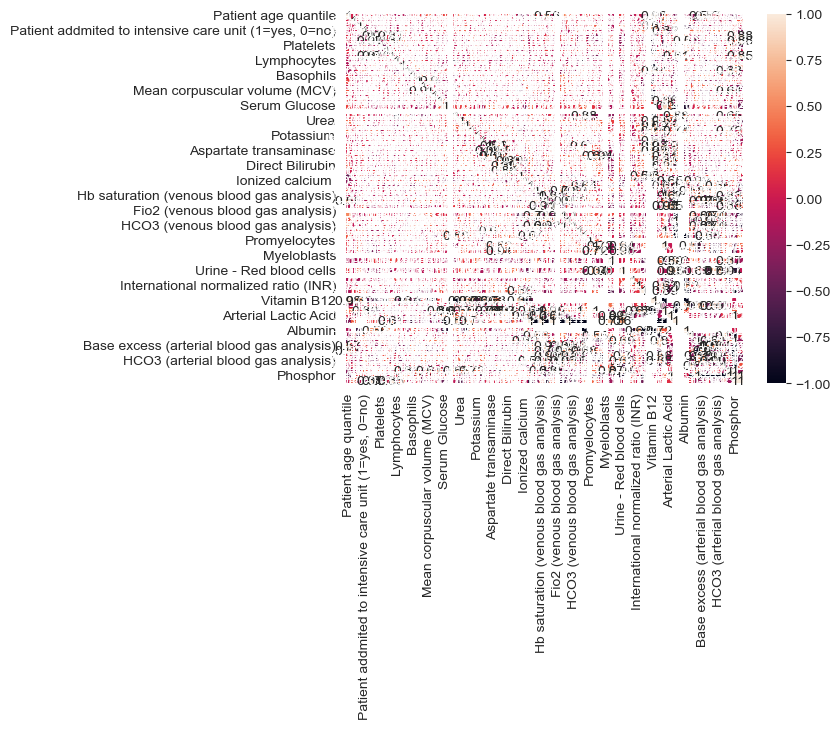

In [48]:
find_corrMatrix = investigation.corr()
johnson.heatmap(find_corrMatrix, annot=True)
ash.show()

<Figure size 640x480 with 0 Axes>

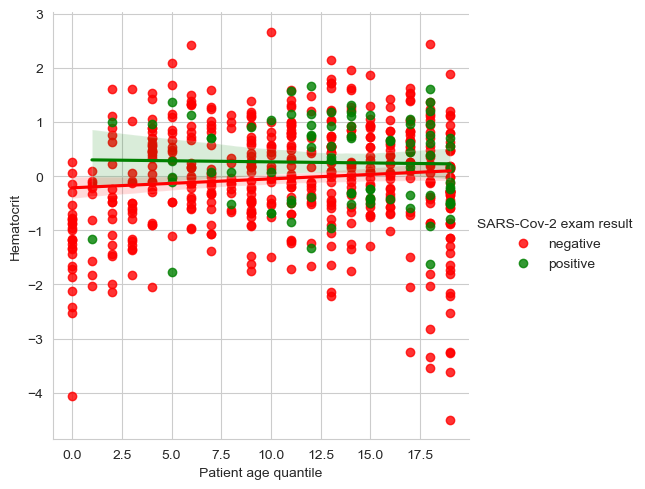

<Figure size 640x480 with 0 Axes>

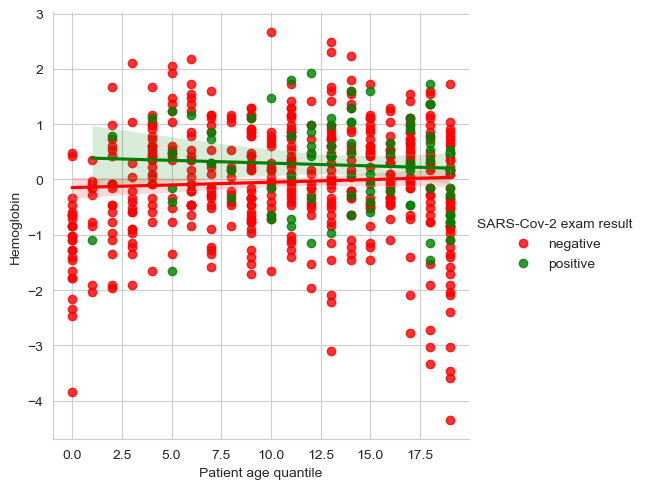

<Figure size 640x480 with 0 Axes>

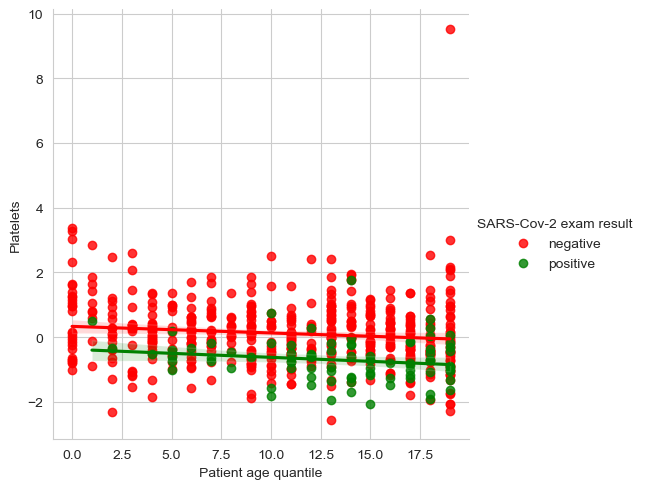

<Figure size 640x480 with 0 Axes>

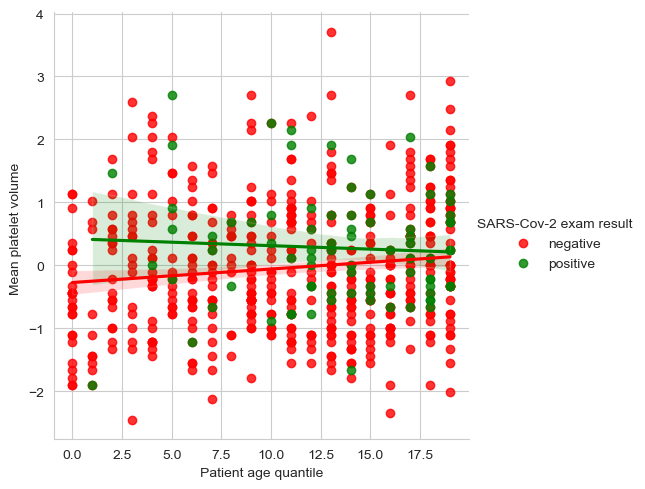

<Figure size 640x480 with 0 Axes>

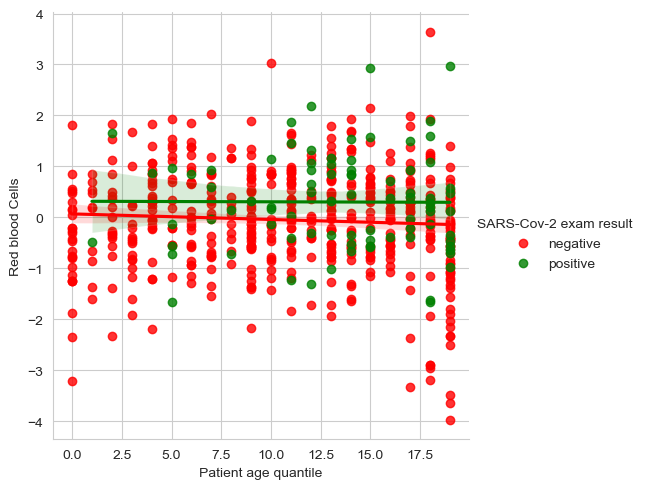

<Figure size 640x480 with 0 Axes>

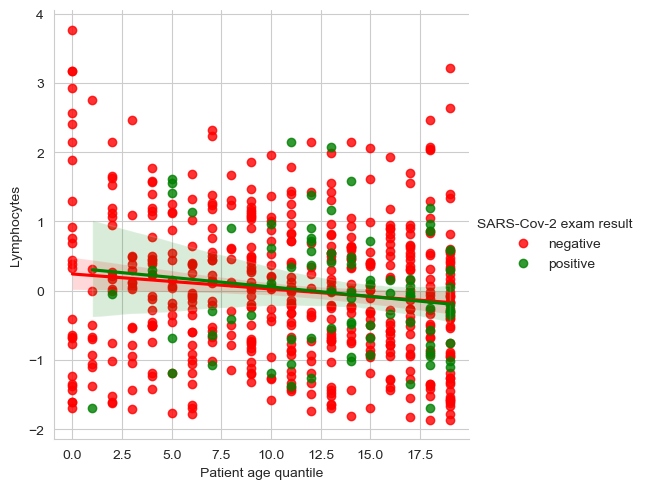

<Figure size 640x480 with 0 Axes>

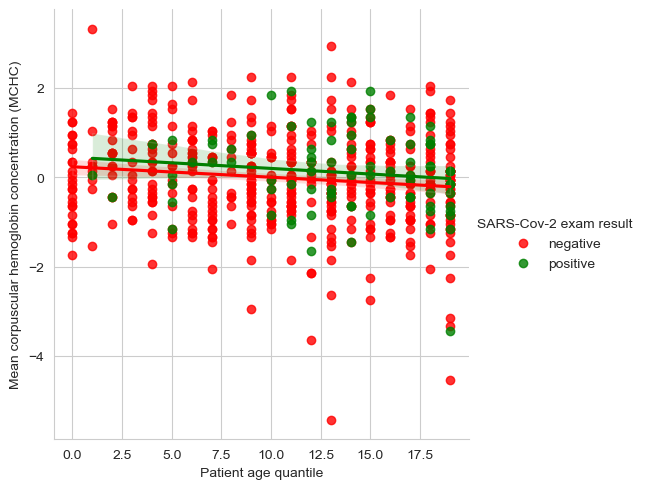

<Figure size 640x480 with 0 Axes>

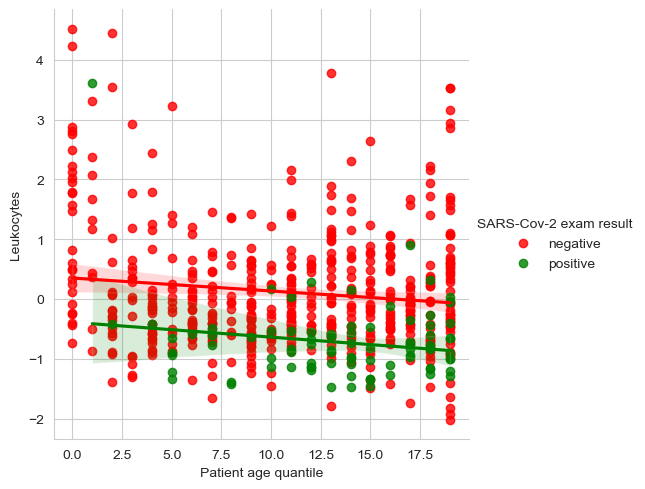

<Figure size 640x480 with 0 Axes>

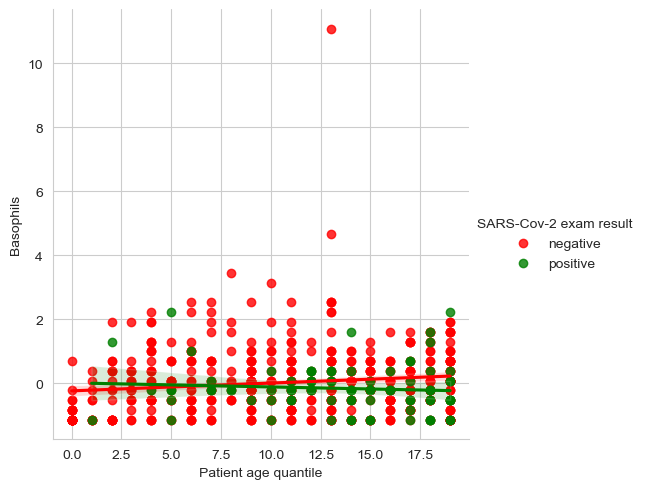

<Figure size 640x480 with 0 Axes>

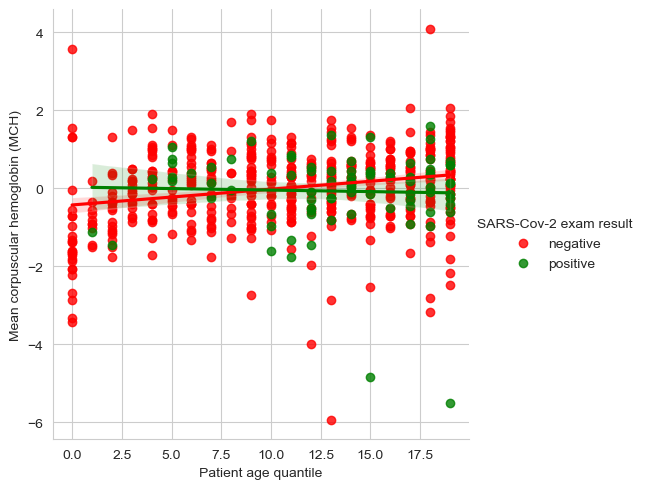

<Figure size 640x480 with 0 Axes>

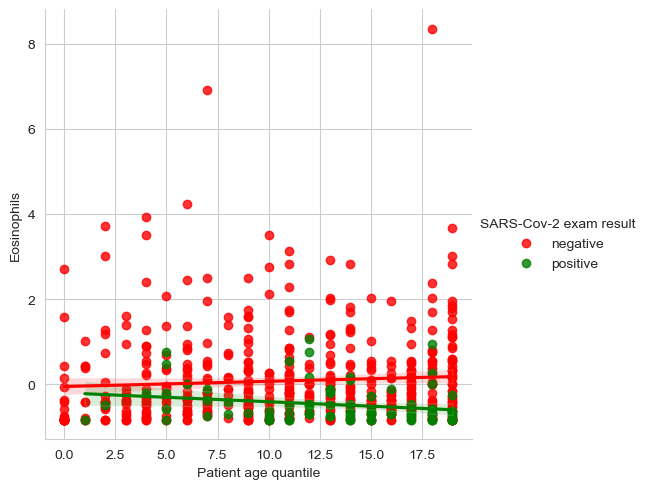

<Figure size 640x480 with 0 Axes>

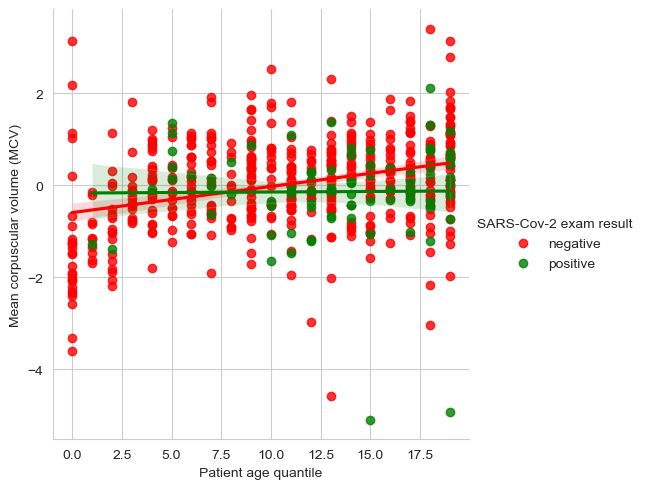

<Figure size 640x480 with 0 Axes>

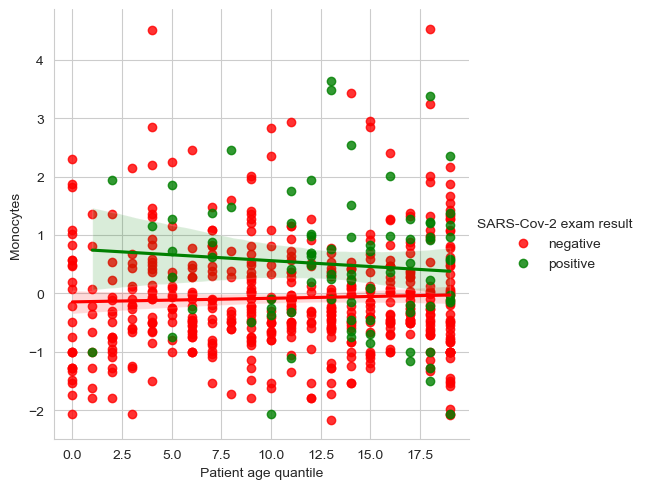

<Figure size 640x480 with 0 Axes>

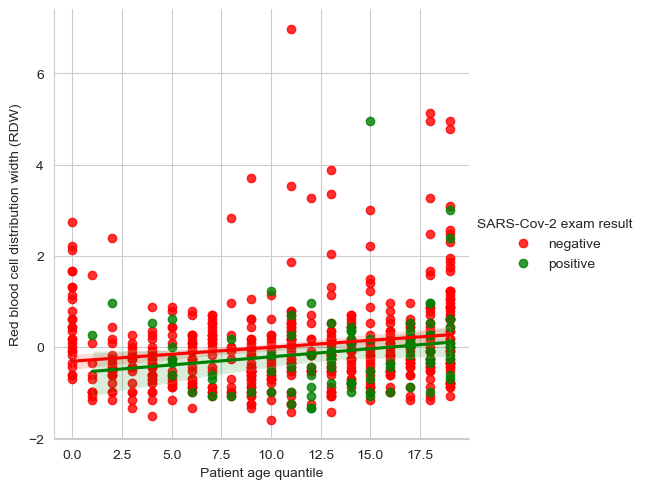

In [49]:
# The resulting output will be a series of scatter plots,
# one for each column in results_blood_per_columns, with patient age quantile on the x-axis, 
# the blood test result on the y-axis, and color-coded points based on the SARS-Cov-2 exam result
# The linear regression line on each plot represents the relationship between the age and blood test result,
# with the slope and direction indicating the strength and direction of the relationship. 
# The hue argument allows for easy comparison of the blood test results between patients who tested positive
# and negative for SARS-Cov-2.

for col in results_blood_per_columns:
    my_palette = ['red', 'green']
    ash.figure()
    johnson.lmplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=investigation, palette=my_palette)

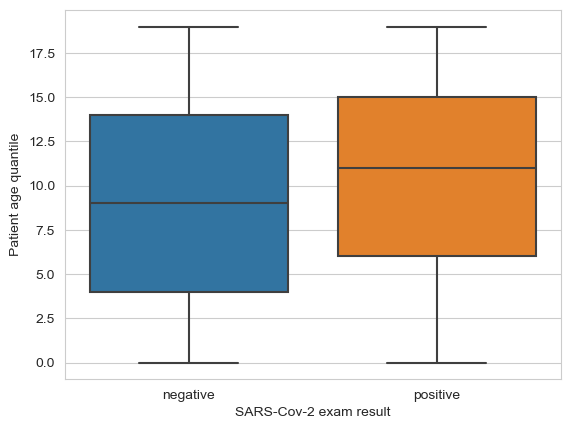

In [50]:
johnson.boxplot(x='SARS-Cov-2 exam result', y='Patient age quantile', data=investigation)
ash.show()

# Plot distribution of SARS-Cov-2 exam result

1. The dataset containing the variables mentioned and the target variable 'SARS-Cov-2 exam result', 
2. we use matplotlib library to plot the distribution. Here's an example code

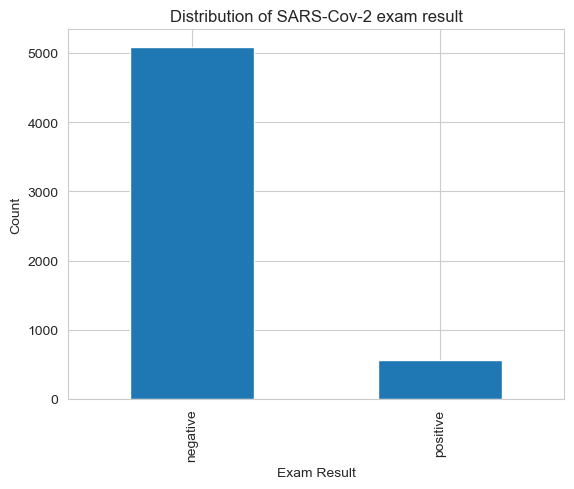

In [51]:
# plot distribution of SARS-Cov-2 exam result
investigation['SARS-Cov-2 exam result'].value_counts().plot(kind='bar')
ash.title('Distribution of SARS-Cov-2 exam result')
ash.xlabel('Exam Result')
ash.ylabel('Count')
ash.show()

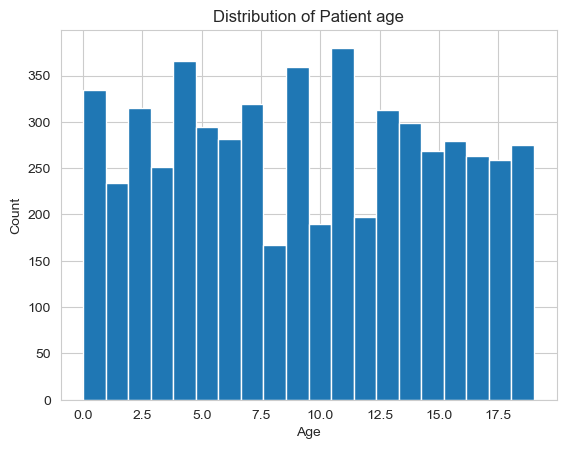

In [52]:
# plot distribution of patient age

investigation['Patient age quantile'].hist(bins=20)
ash.title('Distribution of Patient age')
ash.xlabel('Age')
ash.ylabel('Count')
ash.show()

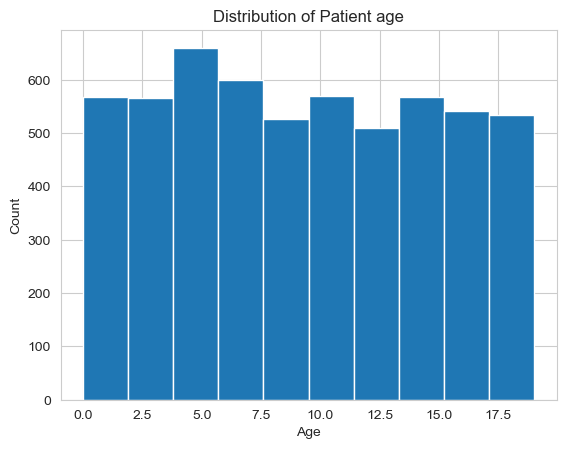

In [53]:
investigation['Patient age quantile'].hist(bins=10)
ash.title('Distribution of Patient age')
ash.xlabel('Age')
ash.ylabel('Count')
ash.show()

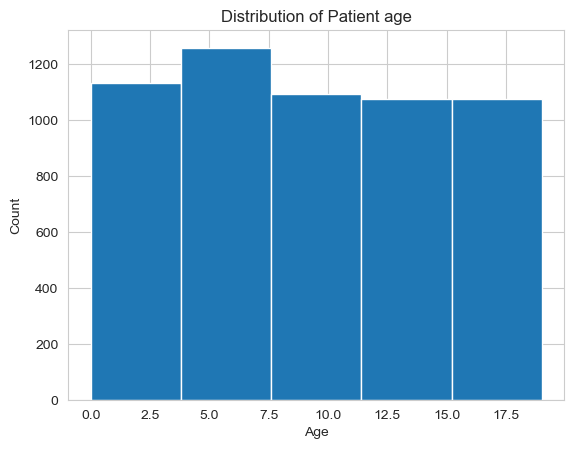

In [54]:
investigation['Patient age quantile'].hist(bins=5)
ash.title('Distribution of Patient age')
ash.xlabel('Age')
ash.ylabel('Count')
ash.show()

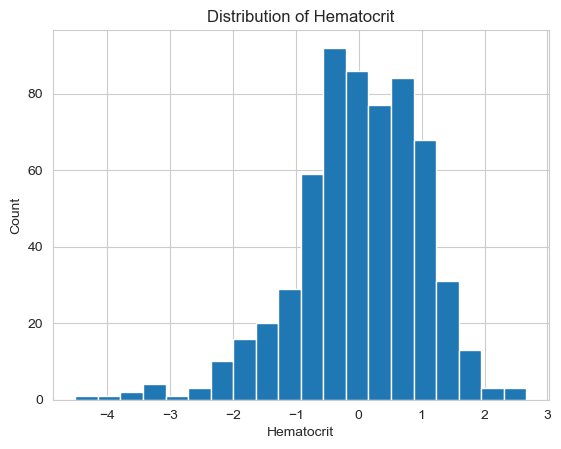

In [55]:
# plot distribution of hematocrit

investigation['Hematocrit'].hist(bins=20)
ash.title('Distribution of Hematocrit')
ash.xlabel('Hematocrit')
ash.ylabel('Count')
ash.show()

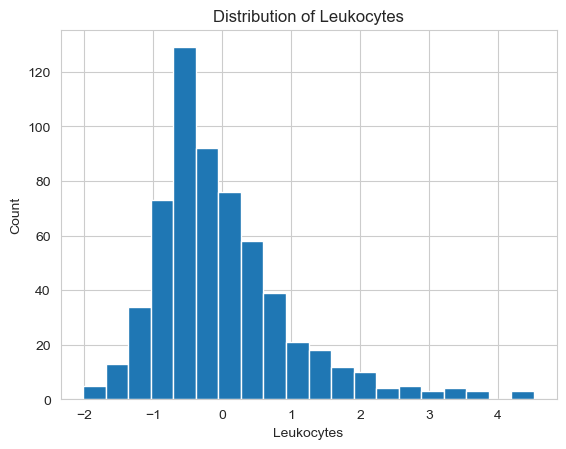

In [56]:
# plot distribution of leukocytes

investigation['Leukocytes'].hist(bins=20)
ash.title('Distribution of Leukocytes')
ash.xlabel('Leukocytes')
ash.ylabel('Count')
ash.show()

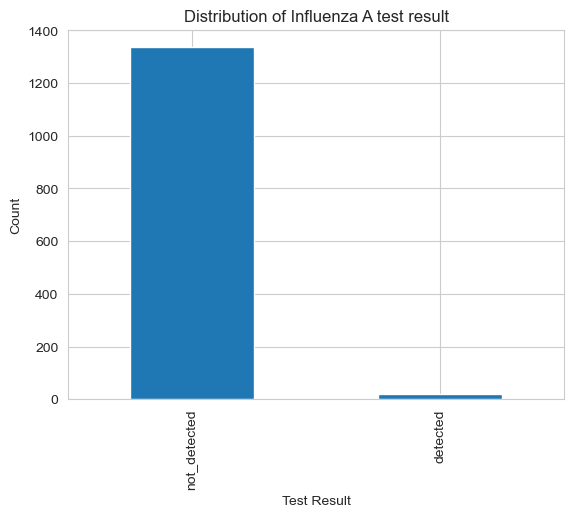

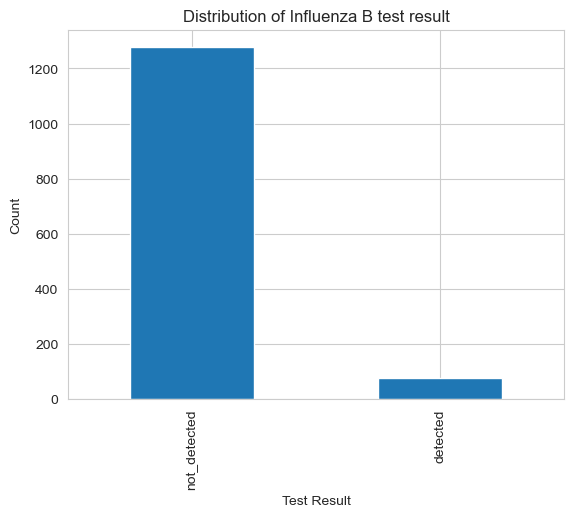

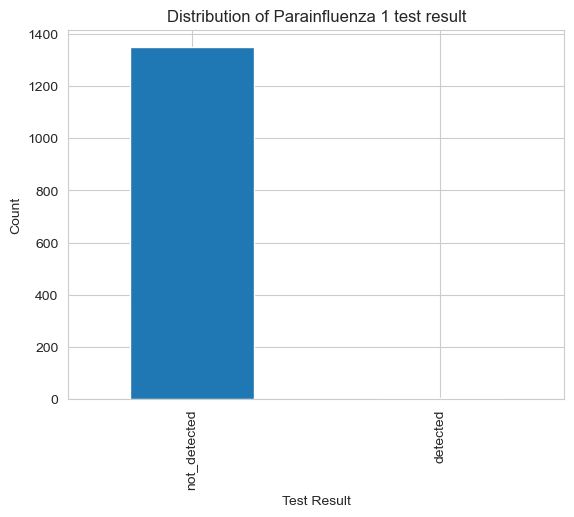

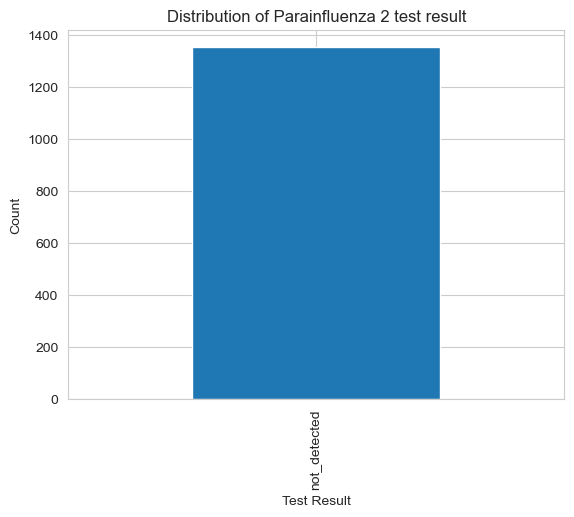

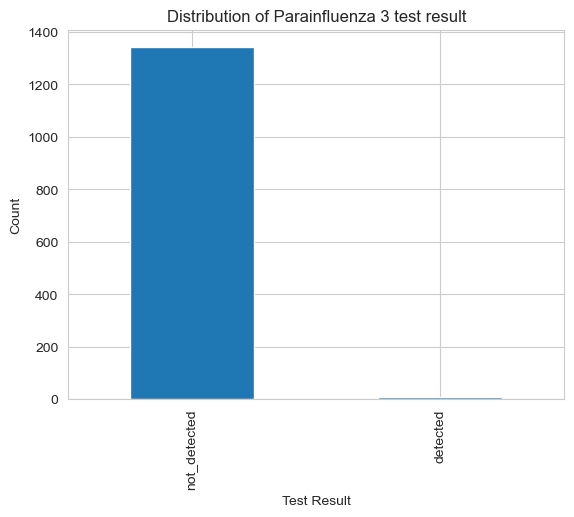

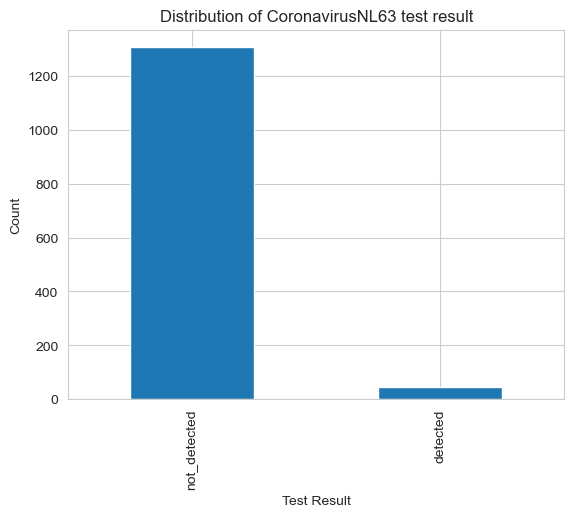

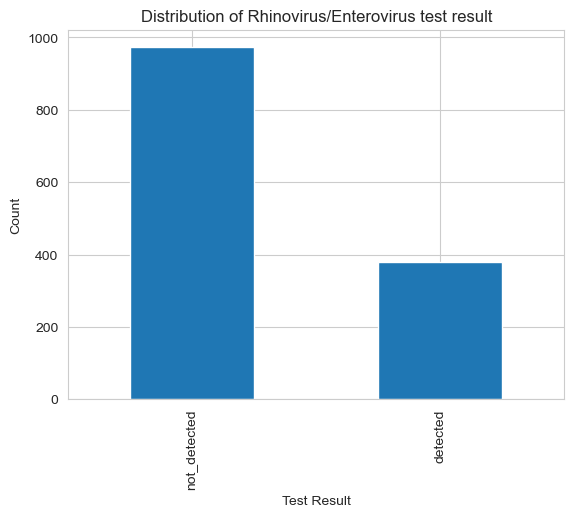

In [57]:
# plot distribution of respiratory virus tests
respiratory_tests = ['Influenza A', 'Influenza B', 'Parainfluenza 1','Parainfluenza 2', 'Parainfluenza 3', 'CoronavirusNL63', 'Rhinovirus/Enterovirus']
for test in respiratory_tests:
    investigation[test].value_counts().plot(kind='bar')
    ash.title(f'Distribution of {test} test result')
    ash.xlabel('Test Result')
    ash.ylabel('Count')
    ash.show()

#  Data Pre-Processing

1. Dropping unnecessary columns.    
2. Data preprocessing is a critical step in the data analysis pipeline that involves cleaning,
3. Features Selection
4. transforming, and preparing raw data into a format that is suitable for analysis 

#  Getting rid of columns that are not needed or relevant

1. To drop all unnecessary columns, you can use the drop() method of a pandas DataFrame 

2. and specify the column names to be dropped as a list. 

3. Assuming your DataFrame is named df, the code to drop the columns would be

In [58]:
investigation = investigation.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 
                               'Patient addmited to semi-intensive unit (1=yes, 0=no)', 
                               'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)


In [59]:
# Let print the new head of our dataset
display(investigation)

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13               negative         NaN         NaN   
1                       17               negative    0.236515   -0.022340   
2                        8               negative         NaN         NaN   
3                        5               negative         NaN         NaN   
4                       15               negative         NaN         NaN   
...                    ...                    ...         ...         ...   
5639                     3               positive         NaN         NaN   
5640                    17               negative         NaN         NaN   
5641                     4               negative         NaN         NaN   
5642                    10               negative         NaN         NaN   
5643                    19               positive    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                                  NaN         NaN  ...   
1                                            -0.950790   -0.094610  ...   
2                                                  NaN         NaN  ...   
3                                                  NaN         NaN  ...   
4                                                  NaN         NaN  ...   
...                                                ...         ...  ...   
5639                                               NaN         NaN  ...   
5640                                               NaN         NaN  ...   
5641                                               NaN         NaN  ...   
5642                                               NaN         NaN  ...   
5643                                         -0.353319   -1.288428  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
5639                                   NaN   
5640                                   NaN   
5641                                   NaN   
5642                                   NaN   
5643                                   NaN   

      pCO2 (arterial blood gas analysis)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
...                                  ...   
5639                                 NaN   
5640                                 NaN   
5641                                 NaN   
5642                                 NaN   
5643                                 NaN   

      Base excess (arterial blood gas analysis)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                            

In [60]:
case_study=investigation

case_study

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13               negative         NaN         NaN   
1                       17               negative    0.236515   -0.022340   
2                        8               negative         NaN         NaN   
3                        5               negative         NaN         NaN   
4                       15               negative         NaN         NaN   
...                    ...                    ...         ...         ...   
5639                     3               positive         NaN         NaN   
5640                    17               negative         NaN         NaN   
5641                     4               negative         NaN         NaN   
5642                    10               negative         NaN         NaN   
5643                    19               positive    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                                  NaN         NaN  ...   
1                                            -0.950790   -0.094610  ...   
2                                                  NaN         NaN  ...   
3                                                  NaN         NaN  ...   
4                                                  NaN         NaN  ...   
...                                                ...         ...  ...   
5639                                               NaN         NaN  ...   
5640                                               NaN         NaN  ...   
5641                                               NaN         NaN  ...   
5642                                               NaN         NaN  ...   
5643                                         -0.353319   -1.288428  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
5639                                   NaN   
5640                                   NaN   
5641                                   NaN   
5642                                   NaN   
5643                                   NaN   

      pCO2 (arterial blood gas analysis)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   
...                                  ...   
5639                                 NaN   
5640                                 NaN   
5641                                 NaN   
5642                                 NaN   
5643                                 NaN   

      Base excess (arterial blood gas analysis)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                            

# Data Cleaning:

1. Handling Missing Values

In [61]:
# "investigation.isnull()" will return a Boolean DataFrame with the same shape as 
# "investigation", where each value in the DataFrame is either "True" or "False" 
# depending on whether the corresponding value in "investigation" is null or missing.

case_study.isnull()

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    False                   False        True        True   
1                    False                   False       False       False   
2                    False                   False        True        True   
3                    False                   False        True        True   
4                    False                   False        True        True   
...                    ...                     ...         ...         ...   
5639                 False                   False        True        True   
5640                 False                   False        True        True   
5641                 False                   False        True        True   
5642                 False                   False        True        True   
5643                 False                   False       False       False   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0          True                   True             True         True   
1         False                  False            False        False   
2          True                   True             True         True   
3          True                   True             True         True   
4          True                   True             True         True   
...         ...                    ...              ...          ...   
5639       True                   True             True         True   
5640       True                   True             True         True   
5641       True                   True             True         True   
5642       True                   True             True         True   
5643      False                  False            False        False   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                                 True        True  ...   
1                                                False       False  ...   
2                                                 True        True  ...   
3                                                 True        True  ...   
4                                                 True        True  ...   
...                                                ...         ...  ...   
5639                                              True        True  ...   
5640                                              True        True  ...   
5641                                              True        True  ...   
5642                                              True        True  ...   
5643                                             False       False  ...   

      Hb saturation (arterial blood gases)  \
0                                     True   
1                                     True   
2                                     True   
3                                     True   
4                                     True   
...                                    ...   
5639                                  True   
5640                                  True   
5641                                  True   
5642                                  True   
5643                                  True   

      pCO2 (arterial blood gas analysis)  \
0                                   True   
1                                   True   
2                                   True   
3                                   True   
4                                   True   
...                                  ...   
5639                                True   
5640                                True   
5641                                True   
5642                                True   
5643                                True   

      Base excess (arterial blood gas analysis)  \
0                                          True   
1                                          True   
2                                          True   
3                

In [62]:
# The code "investigation.isna().sum()", 
# it will calculate the total number of missing or null values in each column of the 
# "investigation" DataFrame and return a new Pandas Series object containing the results.

print(investigation.isna().sum())

Patient age quantile                     0
SARS-Cov-2 exam result                   0
Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
                                      ... 
HCO3 (arterial blood gas analysis)    5617
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
Length: 107, dtype: int64


# Verify the presence of typical or common types of missing data.

1. To verify if there are any missing values in a dataset,

2. We can check for standard missing values which are represented by either blank spaces or NaN values. 

3. The method "dataframe.isnull()" can be used to check for these standard missing values, 

4. And it returns a Boolean output of either True or False

In [63]:
print (investigation['SARS-Cov-2 exam result'])

# The ".isna()" method is used to check for missing values in a pandas dataframe.
# The output is "True" if the element is missing (i.e., contains a NaN value), 
# and "False" if the element is not missing.
print (investigation['SARS-Cov-2 exam result'].isna()) 

# The method ".isna().sum()" is used to generate a 
# summary of all the missing values present in a dataset
print(investigation.isna().sum())

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
5639    False
5640    False
5641    False
5642    False
5643    False
Name: SARS-Cov-2 exam result, Length: 5644, dtype: bool
Patient age quantile                     0
SARS-Cov-2 exam result                   0
Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
                                      ... 
HCO3 (arterial blood gas analysis)    5617
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
Length: 107, dtype: int64


In [64]:
for col in investigation.columns:
    missing_values_col = investigation[col].isnull().sum()
    percentage_missing = missing_values_col / len(investigation) * 100
    
    print(f" Column {col} has {missing_values_col} missing values ({percentage_missing: 2f}%)")

 Column Patient age quantile has 0 missing values ( 0.000000%)
 Column SARS-Cov-2 exam result has 0 missing values ( 0.000000%)
 Column Hematocrit has 5041 missing values ( 89.316088%)
 Column Hemoglobin has 5041 missing values ( 89.316088%)
 Column Platelets has 5042 missing values ( 89.333806%)
 Column Mean platelet volume  has 5045 missing values ( 89.386960%)
 Column Red blood Cells has 5042 missing values ( 89.333806%)
 Column Lymphocytes has 5042 missing values ( 89.333806%)
 Column Mean corpuscular hemoglobin concentration (MCHC) has 5042 missing values ( 89.333806%)
 Column Leukocytes has 5042 missing values ( 89.333806%)
 Column Basophils has 5042 missing values ( 89.333806%)
 Column Mean corpuscular hemoglobin (MCH) has 5042 missing values ( 89.333806%)
 Column Eosinophils has 5042 missing values ( 89.333806%)
 Column Mean corpuscular volume (MCV) has 5042 missing values ( 89.333806%)
 Column Monocytes has 5043 missing values ( 89.351524%)
 Column Red blood cell distribution 

#  We drop the columns where missing values are above 90% by calculating the percentage of missing

1. values for each column and then dropping the columns where the percentage of missing values is above 90%

2. These columns do not provide significant value to our analysis, so we should remove them.

In [65]:
# Calculate the percentage of missing values for each column
percent_missing = investigation.isnull().sum() * 100 / len(investigation)

percent_missing

Patient age quantile                   0.000000
SARS-Cov-2 exam result                 0.000000
Hematocrit                            89.316088
Hemoglobin                            89.316088
Platelets                             89.333806
                                        ...    
HCO3 (arterial blood gas analysis)    99.521616
pO2 (arterial blood gas analysis)     99.521616
Arteiral Fio2                         99.645641
Phosphor                              99.645641
ctO2 (arterial blood gas analysis)    99.521616
Length: 107, dtype: float64

In [66]:
# Drop the columns where the percentage of missing values is above 90%
investigation = investigation.drop(percent_missing[percent_missing > 90].index, axis=1)

In [67]:
# new_case_study that contains all columns where the percentage of missing values is less than 90%

new_case_study = investigation.loc[:, investigation.isnull().mean() < 90]

new_case_study

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13               negative         NaN         NaN   
1                       17               negative    0.236515   -0.022340   
2                        8               negative         NaN         NaN   
3                        5               negative         NaN         NaN   
4                       15               negative         NaN         NaN   
...                    ...                    ...         ...         ...   
5639                     3               positive         NaN         NaN   
5640                    17               negative         NaN         NaN   
5641                     4               negative         NaN         NaN   
5642                    10               negative         NaN         NaN   
5643                    19               positive    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                                  NaN         NaN  ...   
1                                            -0.950790   -0.094610  ...   
2                                                  NaN         NaN  ...   
3                                                  NaN         NaN  ...   
4                                                  NaN         NaN  ...   
...                                                ...         ...  ...   
5639                                               NaN         NaN  ...   
5640                                               NaN         NaN  ...   
5641                                               NaN         NaN  ...   
5642                                               NaN         NaN  ...   
5643                                         -0.353319   -1.288428  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   
...            ...              ...              ...              ...   
5639           NaN              NaN              NaN              NaN   
5640           NaN              NaN              NaN              NaN   
5641           NaN              NaN              NaN              NaN   
5642           NaN              NaN              NaN              NaN   
5643           NaN              NaN              NaN              NaN   

      Inf A H1N1 2009  Bordetella pertussis Metapneumovirus Parainfluenza 2  \
0                 NaN                   NaN             NaN             NaN   
1        not_detected          not_detected    not_detected    not_detected   
2                 NaN                   NaN             NaN             NaN   
3                 NaN                   NaN             NaN             NaN   
4        not_detected          not_detected

# Managing or addressing missing values within individual columns.

1. fill missing values with median of the respective column if the missing values are continuous varaiable

2. fill missing values with mode of the respective column if the missing values are discrete varaiable

In [68]:
# Fill missing values with median for numeric columns
new_case_study.fillna(new_case_study.median(), inplace=True)

# Fill missing values with mode for object-type columns
for col in new_case_study.columns:
    if new_case_study[col].dtype == 'object':
        new_case_study[col].fillna(new_case_study[col].mode()[0], inplace=True)

In [69]:
print(new_case_study.isnull().sum())

Patient age quantile                                0
SARS-Cov-2 exam result                              0
Hematocrit                                          0
Hemoglobin                                          0
Platelets                                           0
Mean platelet volume                                0
Red blood Cells                                     0
Lymphocytes                                         0
Mean corpuscular hemoglobin concentration (MCHC)    0
Leukocytes                                          0
Basophils                                           0
Mean corpuscular hemoglobin (MCH)                   0
Eosinophils                                         0
Mean corpuscular volume (MCV)                       0
Monocytes                                           0
Red blood cell distribution width (RDW)             0
Respiratory Syncytial Virus                         0
Influenza A                                         0
Influenza B                 

In [70]:
new_case_study.shape

(5644, 35)

In [71]:
new_case_study

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13               negative    0.053407    0.040316   
1                       17               negative    0.236515   -0.022340   
2                        8               negative    0.053407    0.040316   
3                        5               negative    0.053407    0.040316   
4                       15               negative    0.053407    0.040316   
...                    ...                    ...         ...         ...   
5639                     3               positive    0.053407    0.040316   
5640                    17               negative    0.053407    0.040316   
5641                     4               negative    0.053407    0.040316   
5642                    10               negative    0.053407    0.040316   
5643                    19               positive    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0     -0.121716              -0.101517         0.013852    -0.014267   
1     -0.517413               0.010677         0.102004     0.318366   
2     -0.121716              -0.101517         0.013852    -0.014267   
3     -0.121716              -0.101517         0.013852    -0.014267   
4     -0.121716              -0.101517         0.013852    -0.014267   
...         ...                    ...              ...          ...   
5639  -0.121716              -0.101517         0.013852    -0.014267   
5640  -0.121716              -0.101517         0.013852    -0.014267   
5641  -0.121716              -0.101517         0.013852    -0.014267   
5642  -0.121716              -0.101517         0.013852    -0.014267   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                            -0.054585   -0.212879  ...   
1                                            -0.950790   -0.094610  ...   
2                                            -0.054585   -0.212879  ...   
3                                            -0.054585   -0.212879  ...   
4                                            -0.054585   -0.212879  ...   
...                                                ...         ...  ...   
5639                                         -0.054585   -0.212879  ...   
5640                                         -0.054585   -0.212879  ...   
5641                                         -0.054585   -0.212879  ...   
5642                                         -0.054585   -0.212879  ...   
5643                                         -0.353319   -1.288428  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0     not_detected     not_detected     not_detected     not_detected   
1     not_detected     not_detected     not_detected     not_detected   
2     not_detected     not_detected     not_detected     not_detected   
3     not_detected     not_detected     not_detected     not_detected   
4     not_detected     not_detected     not_detected     not_detected   
...            ...              ...              ...              ...   
5639  not_detected     not_detected     not_detected     not_detected   
5640  not_detected     not_detected     not_detected     not_detected   
5641  not_detected     not_detected     not_detected     not_detected   
5642  not_detected     not_detected     not_detected     not_detected   
5643  not_detected     not_detected     not_detected     not_detected   

      Inf A H1N1 2009  Bordetella pertussis Metapneumovirus Parainfluenza 2  \
0        not_detected          not_detected    not_detected    not_detected   
1        not_detected          not_detected    not_detected    not_detected   
2        not_detected          not_detected    not_detected    not_detected   
3        not_detected          not_detected    not_detected    not_detected   
4        not_detected          not_detected

In [72]:
# Get the numerical columns
numerical_columns = new_case_study.select_dtypes(include='number').columns

# Print out the numerical columns
print("Numerical Columns:")
for column in numerical_columns:
    print(column)

Numerical Columns:
Patient age quantile
Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


In [73]:
for col_name in new_case_study.columns:
    if new_case_study[col_name].dtypes == 'object':
        unique_cat = len(new_case_study[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name =col_name, unique_cat=unique_cat))

Feature 'SARS-Cov-2 exam result' has 2 categories
Feature 'Respiratory Syncytial Virus' has 2 categories
Feature 'Influenza A' has 2 categories
Feature 'Influenza B' has 2 categories
Feature 'Parainfluenza 1' has 2 categories
Feature 'CoronavirusNL63' has 2 categories
Feature 'Rhinovirus/Enterovirus' has 2 categories
Feature 'Coronavirus HKU1' has 2 categories
Feature 'Parainfluenza 3' has 2 categories
Feature 'Chlamydophila pneumoniae' has 2 categories
Feature 'Adenovirus' has 2 categories
Feature 'Parainfluenza 4' has 2 categories
Feature 'Coronavirus229E' has 2 categories
Feature 'CoronavirusOC43' has 2 categories
Feature 'Inf A H1N1 2009' has 2 categories
Feature 'Bordetella pertussis' has 2 categories
Feature 'Metapneumovirus' has 2 categories
Feature 'Parainfluenza 2' has 1 categories
Feature 'Influenza B, rapid test' has 2 categories
Feature 'Influenza A, rapid test' has 2 categories


# Data Transformation


## To convert categorical features into numerical features:


1. Data encoding: This involves converting categorical or text data into numerical representations that can be processed by algorithms, such as label encoding or one-hot encoding

2. Data reshaping: This involves transforming data from one structure or layout to another, such as converting data from wide format to long format, or vice versa

1. We can use one-hot encoding. This will create new columns for each possible value of a categorical column

2. get dummies method been applied.

2. and assign a 1 or 0 to each row depending on the value of the original column

In [74]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Loop through all columns in the DataFrame
for col in new_case_study.columns:
    # Check if the column is of object data type
    if new_case_study[col].dtype == 'object':
        # Apply label encoding to the object column
        new_case_study[col] = encoder.fit_transform(new_case_study[col])

# Data Normalization


1. Data normalization is important in machine learning because it improves model performance, 

2. Enables faster convergence, enhances robustness to outliers, simplifies model interpretation,

3. And ensures consistency and reproducibility in data preprocessing.

4. It is an essential step in preparing data for machine learning and building accurate and reliable models.


In [75]:
 from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Loop through all columns in the DataFrame
for col in new_case_study.columns:
    # Check if the column is of numeric data type
    if new_case_study[col].dtype in ['int64', 'float64']:
        # Apply Min-Max scaling to the numeric column
        new_case_study[col] = scaler.fit_transform(new_case_study[col].values.reshape(-1, 1))

In [76]:
new_case_study.dtypes

Patient age quantile                                float64
SARS-Cov-2 exam result                                int32
Hematocrit                                          float64
Hemoglobin                                          float64
Platelets                                           float64
Mean platelet volume                                float64
Red blood Cells                                     float64
Lymphocytes                                         float64
Mean corpuscular hemoglobin concentration (MCHC)    float64
Leukocytes                                          float64
Basophils                                           float64
Mean corpuscular hemoglobin (MCH)                   float64
Eosinophils                                         float64
Mean corpuscular volume (MCV)                       float64
Monocytes                                           float64
Red blood cell distribution width (RDW)             float64
Respiratory Syncytial Virus             

# Saving a file in the form of csv 

1. new_case_study.to_csv("Case_Features_Processed_180423.csv") 

2. is a line of Python code that writes the DataFrame new_case_study to a CSV (Comma-Separated Values)

3. file named "Case_Features_Processed_180423.csv"

In [77]:
# The to_csv() method is a built-in method in Pandas, 
# a popular data manipulation library in Python, 
# which allows you to save the data from a DataFrame to a CSV file. 
# The argument "Case_Features_Processed_180423.csv" specifies the filename of the CSV file that will be created.

new_case_study.to_csv('Case_Features_Processed_180423.csv')

#  Checking the desired target column:

In [78]:
# Load the data into a DataFrame
import pandas as ashcroft

jj = ashcroft.read_csv('Case_Features_Processed_180423.csv')

jj['SARS-Cov-2 exam result'].value_counts(normalize = True)

0    0.901134
1    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

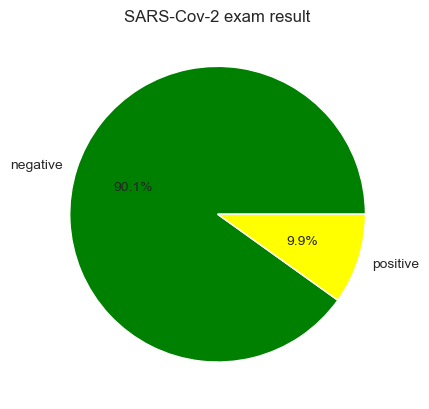

In [79]:
# count the values in the 'SARS-Cov-2 exam result' column
jj = jj['SARS-Cov-2 exam result'].value_counts()

colors = ['green', 'yellow'] # colors for the two parts

# add title
ash.title('SARS-Cov-2 exam result')

# plot a pie chart
ash.pie(investigation_counts, labels=investigation_counts.index, colors=colors, autopct='%1.1f%%')

ash.show()

# Let Fix the imbalanced target data

In [80]:
import pandas as ashcroft
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
# load the dataset
ash_jj = ashcroft.read_csv('Case_Features_Processed_180423.csv')

# split the dataset into features and target
X = ash_jj.drop('SARS-Cov-2 exam result', axis=1)
y = ash_jj['SARS-Cov-2 exam result']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply the random oversampling technique
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# check the class balance
print(ashcroft.Series(y_train_resampled).value_counts())


1    4065
0    4065
Name: SARS-Cov-2 exam result, dtype: int64


1    4065
0    4065
Name: SARS-Cov-2 exam result, dtype: int64


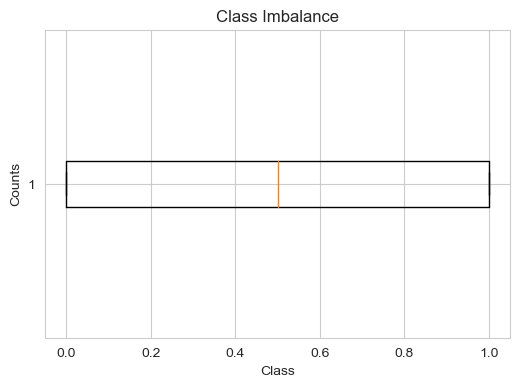

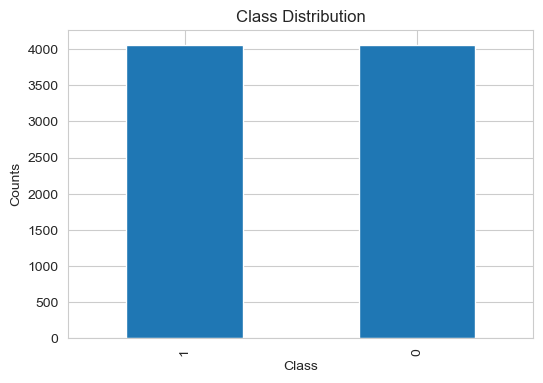

LogisticRegression()

In [81]:
import pandas as ashcroft
import matplotlib.pyplot as ash
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

# load the dataset
ash_jj = ashcroft.read_csv('Case_Features_Processed_180423.csv')

# split the dataset into features and target
X = ash_jj.drop('SARS-Cov-2 exam result', axis=1)
y = ash_jj['SARS-Cov-2 exam result']

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply the random oversampling technique
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# check the class balance
print(ashcroft.Series(y_train_resampled).value_counts())

# plot box plot to visualize class imbalance
ash.figure(figsize=(6, 4))
ash.boxplot(ashcroft.Series(y_train_resampled), vert=False)
ash.xlabel('Class')
ash.ylabel('Counts')
ash.title('Class Imbalance')
ash.show()

# plot bar plot to visualize class distribution
ash.figure(figsize=(6, 4))
ashcroft.Series(y_train_resampled).value_counts().plot(kind='bar')
ash.xlabel('Class')
ash.ylabel('Counts')
ash.title('Class Distribution')
ash.show()

# define and instantiate the logistic regression model
model = LogisticRegression()

# train your model on the resampled data
model.fit(X_train_resampled, y_train_resampled)


# Explore relationship between one variable (Patient age quantile) and target variable (SARS-Cov-2 exam result)

Text(0, 0.5, 'Patient_Age Group with Covid Exams Results')

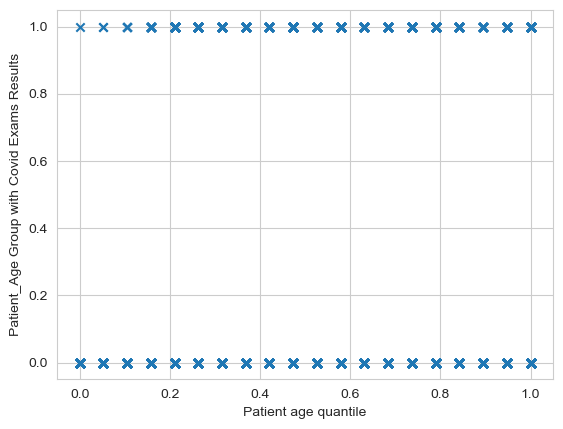

In [82]:
x = ash_jj['Patient age quantile']
y = ash_jj['SARS-Cov-2 exam result']
ash.scatter(x, y, marker='x') 
ash.xlabel('Patient age quantile')
ash.ylabel('Patient_Age Group with Covid Exams Results')

# Predictive Analysis

1. Build and Train The Model

In [83]:
import pandas as ashcroft
import matplotlib.pyplot as ash
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# Loading Dataset and Splitting into Features and Target

In [84]:
# load the dataset
ash_jj = ashcroft.read_csv('Case_Features_Processed_180423.csv')

# split the dataset into features and target
X = ash_jj.drop('SARS-Cov-2 exam result', axis=1)
y = ash_jj['SARS-Cov-2 exam result']

# Split the dataset into train and test sets

1. Split features and target data X, y into traning data (80%) and test data (20%) as X_train, X_test, y_train, y_test.

In [85]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform feature scaling using StandardScaler

In [86]:
# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply the random oversampling technique

In [87]:
# apply the random oversampling technique
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define and instantiate the classification models

In [88]:
# define and instantiate the classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [89]:
# create empty lists to store results
model_names = []
accuracies = []
cms = []
auc_scores = []

# Loop through each model and fit the data

In [90]:
# loop through each model and fit the data
for name, model in models.items():
    print('Model:', name)
    model.fit(X_train_resampled, y_train_resampled)

Model: Logistic Regression
Model: Decision Tree
Model: Random Forest
Model: Gradient Boosting


# Make predictions on test data

In [91]:
# make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy

In [92]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)

# Calculate confusion matrix

In [93]:
# calculate confusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
cms.append(confusion_m)

# Calculate ROC curve and AUC score

##  And Plot ROC Curve

1. Plot ROC Curve for all models

Model: Logistic Regression
Model: Decision Tree
Model: Random Forest
Model: Gradient Boosting


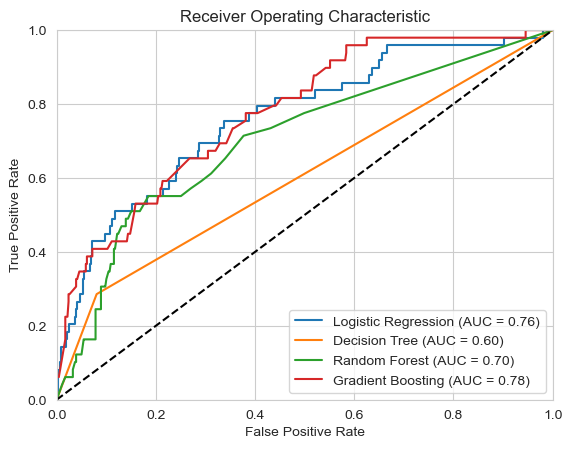

In [96]:
# Load the dataset
ash_jj = ashcroft.read_csv('Case_Features_Processed_180423.csv')

# Split the dataset into features and target
X = ash_jj.drop('SARS-Cov-2 exam result', axis=1)
y = ash_jj['SARS-Cov-2 exam result']

# Split the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.1, random_state=0)

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply the random oversampling technique
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Define and instantiate the classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create empty lists to store results
model_names = []
accuracies = []
cms = []
auc_scores = []

# Loop through each model and fit the data
for name, model in models.items():
    print('Model:', name)
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on validation data
    y_pred = model.predict(X_val_scaled)
    
    # Calculate accuracy on validation data
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    
    # Calculate confusion matrix on validation data
    cm = confusion_matrix(y_val, y_pred)
    cms.append(cm)
    
    # Calculate ROC curve and AUC score on validation data
    y_pred_prob = model.predict_proba(X_val_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    auc = roc_auc_score(y_val, y_pred_prob)
    auc_scores.append(auc)
    
    # Plot ROC curve for each model on validation data
    ash.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, auc))
    
    model_names.append(name)

# Plot ROC curve for all models on validation data
ash.plot([0, 1], [0, 1], 'k--')
ash.xlim([0.0, 1.0])
ash.ylim([0.0, 1.0])
ash.xlabel('False Positive Rate')
ash.ylabel('True Positive Rate')
ash.title('Receiver Operating Characteristic')
ash.legend(loc='lower right')
ash.show()


# Evalaute the Model

## Print classification reports for all models

1. Predict the accuracy using metrics.accuracy_score()

2. Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

3. A higher accuracy indicates that the model is making more correct predictions, 

4. While a lower accuracy suggests that the model's predictions are less reliable.

In [95]:
# print classification reports for all models
for i in range(len(models)):
    print('Model:', model_names[i])
    print('Accuracy:', accuracies[i])
    print('Confusion Matrix:\n', cms[i])
    print('AUC:', auc_scores[i])
    print('Classification Report:')
    print(classification_report(y_test, models[model_names[i]].predict(X_test)))
    print('--------------------------------------')

Model: Logistic Regression
Accuracy: 0.7475642161204605
Confusion Matrix:
 [[774 244]
 [ 41  70]]
AUC: 0.7572080921786226
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1018
           1       0.18      0.65      0.28       111

    accuracy                           0.68      1129
   macro avg       0.56      0.67      0.54      1129
weighted avg       0.87      0.68      0.74      1129

--------------------------------------
Model: Decision Tree
Accuracy: 0.6784765279007972
Confusion Matrix:
 [[694 324]
 [ 39  72]]
AUC: 0.5882228004035469
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1018
           1       0.28      0.24      0.26       111

    accuracy                           0.87      1129
   macro avg       0.60      0.59      0.59      1129
weighted avg       0.86      0.87      0.86      1129

-----------------------

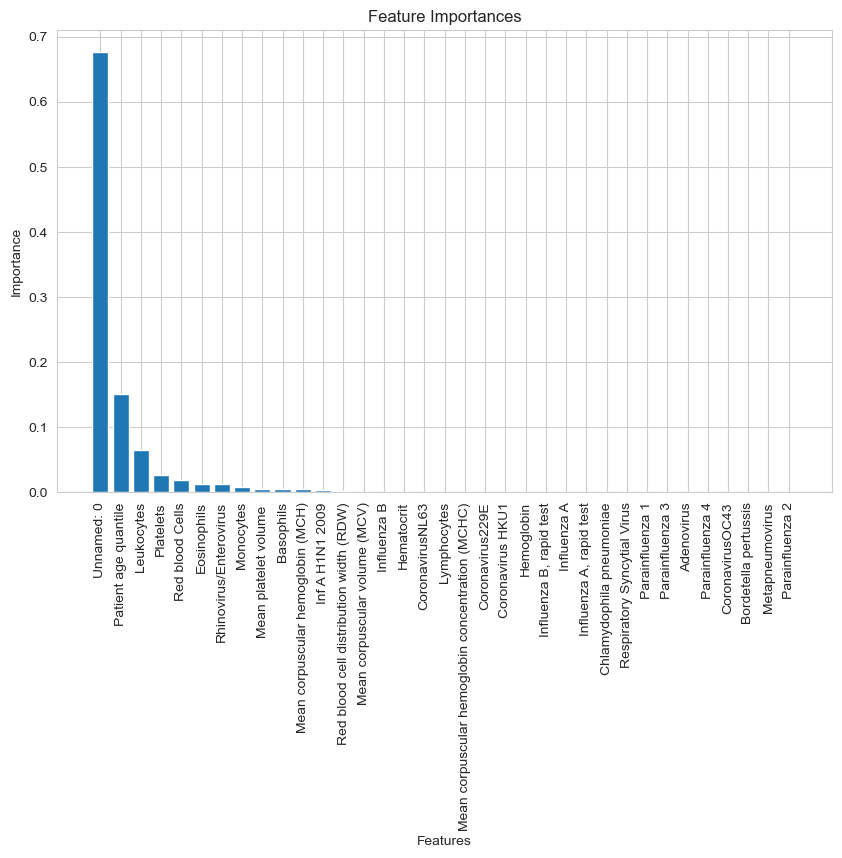

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.9355944450904501
Accuracy: 0.8405668733392383


In [98]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV


# load the dataset
ash_jj = ashcroft.read_csv('Case_Features_Processed_180423.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply the random oversampling technique
oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create a GradientBoostingClassifier model with default hyperparameters
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train_resampled, y_train_resampled)

# Extract feature importances
importances = gbm.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_resampled.shape[1]), importances[indices])
plt.xticks(range(X_train_resampled.shape[1]), X_train_resampled.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Select the top k features based on importance (e.g., top 10)
k = 10
top_k_features = X_train_resampled.columns[indices][:k]

# Update the training and testing data with only the top k features
X_train_resampled_top_k = X_train_resampled[top_k_features]
X_test_top_k = X_test[top_k_features]

# Define hyperparameter grid for GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV with the updated training and testing data
grid = GridSearchCV(gbm, param_grid_gb, scoring='accuracy', cv=5)
grid.fit(X_train_resampled_top_k, y_train_resampled)
best_params = grid.best_params_
best_score = grid.best_score_
y_pred = grid.predict(X_test_top_k)
accuracy = accuracy_score(y_test, y_pred)

print('Best Parameters:', best_params)
print('Best Score:', best_score)
print('Accuracy:', accuracy)


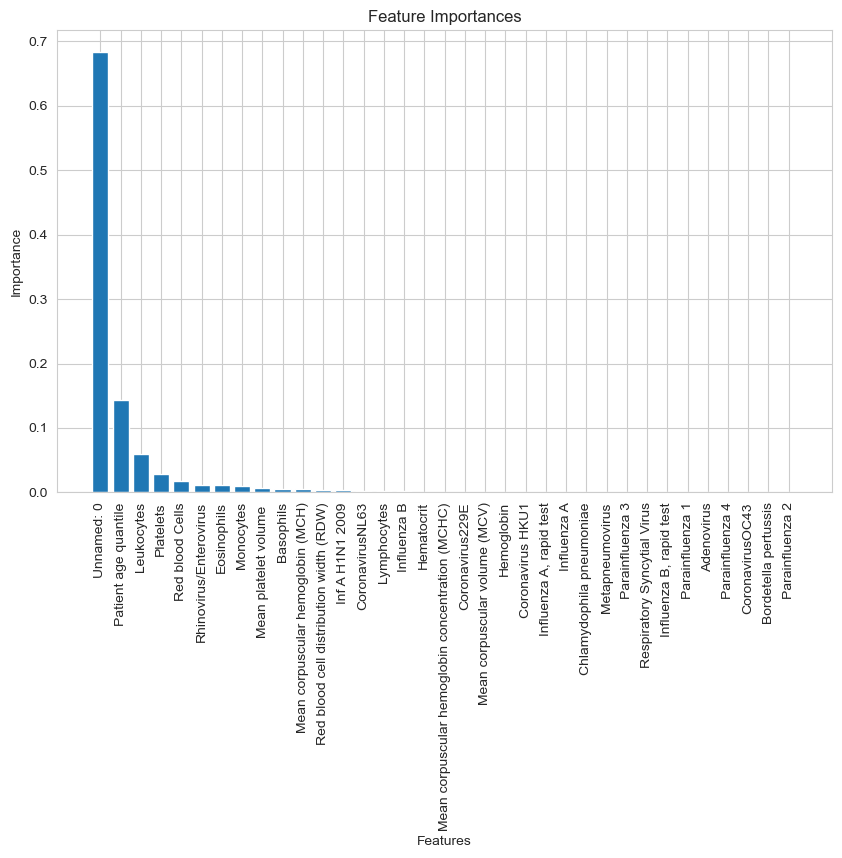

--------------------------------------
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score (MSE): 0.09295640470237891
Mean Squared Error: 0.12335533732705019


In [99]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

# Load your data and split into training and testing sets
# ... (same as before) ...
# load the dataset

ash_jj = ashcroft.read_csv('Case_Features_Processed_180423.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply the random oversampling technique
oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


# Create a GradientBoostingRegressor model with default hyperparameters
gbm = GradientBoostingRegressor()

# Fit the model to the training data
gbm.fit(X_train_resampled, y_train_resampled)

# Extract feature importances
importances = gbm.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_resampled.shape[1]), importances[indices])
plt.xticks(range(X_train_resampled.shape[1]), X_train_resampled.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Select the top k features based on importance (e.g., top 10)
k = 10
top_k_features = X_train_resampled.columns[indices][:k]

# Update the training and testing data with only the top k features
X_train_resampled_top_k = X_train_resampled[top_k_features]
X_test_top_k = X_test[top_k_features]

# Define hyperparameter grid for GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV with the updated training and testing data
grid = GridSearchCV(gbm, param_grid_gb, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_resampled_top_k, y_train_resampled)
best_params = grid.best_params_
best_score = -grid.best_score_  # Negate the score to convert from negative MSE to positive MSE
y_pred = grid.predict(X_test_top_k)
mse = mean_squared_error(y_test, y_pred)


#print('Best Parameters:', best_params)
#print('Best Score:', best_score)
print('--------------------------------------')
print('Best Parameters:', best_params)
print('Best Score (MSE):', best_score)
print('Mean Squared Error:', mse)


# Tune The Parameter